In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cmath


date_parser = lambda dates: pd.datetime.strptime(dates, "%d/%m/%y") 
data_time  = pd.read_csv("CBA_1991-2018.csv",parse_dates = ["Date"], 
                         index_col = 'Date', date_parser = date_parser) 

In [2]:
data_time.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1991-08-31,6.78690,6.78690,6.78690,6.78690,2.126211,0
1991-09-30,7.50763,7.50763,7.50763,7.50763,2.352003,0
1991-10-31,7.40753,7.40753,7.40753,7.40753,2.320643,0
1991-11-30,7.86800,7.86800,7.86800,7.86800,2.464900,0
1991-12-31,7.32745,7.32745,7.32745,7.32745,2.295555,0


In [3]:
data_high = data_time['High']

In [4]:
data_high.head()

Date
1991-08-31    6.78690
1991-09-30    7.50763
1991-10-31    7.40753
1991-11-30    7.86800
1991-12-31    7.32745
Name: High, dtype: float64

In [5]:
df = pd.DataFrame({'a': [1, 2, 3, 4, 5, 6],                    'b': [1, 1, 2, 3, 5, 8],
                    'c': [1, 4, 9, 16, 25, 36]})
df

,a,b,c
0,1,1,1
1,2,1,4
2,3,2,9
3,4,3,16
4,5,5,25
5,6,8,36


In [6]:
high_1_diff = data_high.diff(1)
high_1_diff.head()

Date
1991-08-31        NaN
1991-09-30    0.72073
1991-10-31   -0.10010
1991-11-30    0.46047
1991-12-31   -0.54055
Name: High, dtype: float64

In [7]:
df.diff(2)


,a,b,c
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,2.0,1.0,8.0
3,2.0,2.0,12.0
4,2.0,3.0,16.0
5,2.0,5.0,20.0


In [8]:
high_2_diff = high_1_diff.diff(1)
high_2_diff.head()


Date
1991-08-31        NaN
1991-09-30        NaN
1991-10-31   -0.82083
1991-11-30    0.56057
1991-12-31   -1.00102
Name: High, dtype: float64

/Users/apple/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

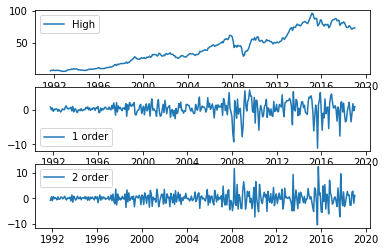

In [9]:
plt.figure()
fig, ax = plt.subplots(3,1)
ax[0].plot(data_high)
ax[1].plot(high_1_diff)
ax[2].plot(high_2_diff)

ax[0].legend(['High'], loc=2)
ax[1].legend(['1 order'], loc=3)
ax[2].legend(['2 order'], loc=2)

In [10]:
result = []
for index in np.arange( 12 , len(data_high)-12 ):
#        print(index)
    Sum = 0.5*( data_high[ index - 12] + data_high[ index + 12 ]) + data_high[index - 11:index+12].sum() 
    mean = Sum / 24
    result.append(mean)

In [11]:
len(result)

305

In [12]:
data_cma24_list = result

In [13]:
len(data_high)

329

In [14]:
nan = [np.nan]*12
nan


[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

In [15]:
data_cma24_list = nan+data_cma24_list+nan
data_cma24_list
len(data_cma24_list)

329

In [16]:
data_cma24 = pd.Series(data_cma24_list, index = data_high.index)
data_cma24

Date
1991-08-31          NaN
1991-09-30          NaN
1991-10-31          NaN
1991-11-30          NaN
1991-12-31          NaN
1992-01-31          NaN
1992-02-29          NaN
1992-03-31          NaN
1992-04-30          NaN
1992-05-31          NaN
1992-06-30          NaN
1992-07-31          NaN
1992-08-31     7.412953
1992-09-30     7.517644
1992-10-31     7.613992
1992-11-30     7.691362
1992-12-31     7.777492
1993-01-31     7.865498
1993-02-28     7.923056
1993-03-31     7.957466
1993-04-30     7.979781
1993-05-31     8.000844
1993-06-30     8.030666
1993-07-31     8.064241
1993-08-31     8.107619
1993-09-30     8.167680
1993-10-31     8.227950
1993-11-30     8.294475
1993-12-31     8.380813
1994-01-31     8.475284
                ...    
2016-07-31    81.565079
2016-08-31    81.512292
2016-09-30    81.545000
2016-10-31    81.579792
2016-11-30    81.487083
2016-12-31    81.322917
2017-01-31    81.296250
2017-02-28    81.311250
2017-03-31    81.258542
2017-04-30    81.115834
2017-05-31 

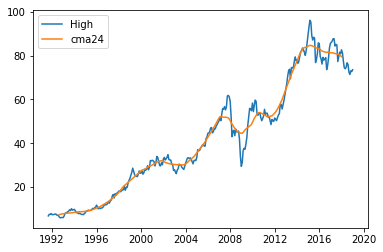

In [17]:
plt.figure()
plt.plot(data_high)
plt.plot(data_cma24)
plt.legend(['High','cma24'], loc=2)




In [18]:
rolling_data = data_high.rolling(12,center=True).mean().rolling(2,center = True).mean()
rolling_data

Date
1991-08-31          NaN
1991-09-30          NaN
1991-10-31          NaN
1991-11-30          NaN
1991-12-31          NaN
1992-01-31          NaN
1992-02-29          NaN
1992-03-31     7.323696
1992-04-30     7.229016
1992-05-31     7.104723
1992-06-30     6.973757
1992-07-31     6.843625
1992-08-31     6.758956
1992-09-30     6.748112
1992-10-31     6.792740
1992-11-30     6.846128
1992-12-31     6.937470
1993-01-31     7.073859
1993-02-28     7.260715
1993-03-31     7.502211
1993-04-30     7.806271
1993-05-31     8.123261
1993-06-30     8.408968
1993-07-31     8.711358
1993-08-31     8.972040
1993-09-30     9.098001
1993-10-31     9.122193
1993-11-30     9.113434
1993-12-31     9.064217
1994-01-31     8.987472
                ...    
2016-07-31    78.831250
2016-08-31    79.107083
2016-09-30    79.716250
2016-10-31    80.537083
2016-11-30    81.373333
2016-12-31    81.994375
2017-01-31    82.542917
2017-02-28    83.066250
2017-03-31    83.461251
2017-04-30    83.782918
2017-05-31 

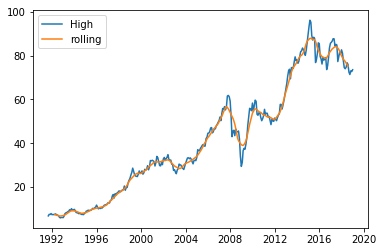

In [19]:
plt.figure()
plt.plot(data_high)
plt.plot(rolling_data)
plt.legend(['High','rolling'], loc=2)

In [20]:
def mse(x,y):
    diff = [(x[i] - y[i]) for i in range(len(x))]
    diff =  np.array(diff)[~np.isnan(diff)]
    mse = 0
    for i in range(len(diff)):
        mse += diff[i] ** 2
    return mse/len(diff)


def mae(x,y):
    diff = [(x[i] - y[i]) for i in range(len(x))]
    diff =  np.array(diff)[~np.isnan(diff)]
    mse = 0
    for i in range(len(diff)):
        mse += np.abs(diff[i]) 
    return mse/len(diff)

In [21]:
MSE1 = mse(data_high,data_cma24)
print("MSE1: ",MSE1)
RMSE1 = cmath.sqrt(MSE1)
print("RMSE1: ",MSE1)
MAE1 = mae(data_high,data_cma24)


MSE2 = mse(data_high,rolling_data)
RMSE2 = cmath.sqrt(MSE2)
MAE2 = mae(data_high,rolling_data)

MSE1:  11.10179060942369
RMSE1:  11.10179060942369


In [22]:
y_325 = 0.2 * sum([data_high[i] for i in np.arange(-9,-4)])
print('Fourth last month: ' , y_325)


y_326 = 0.2 * sum([data_high[i] for i in range(-8,-4)]+[y_325])
print('Third last month: ' , y_326)


y_327 = 0.2 * sum([data_high[i] for i in range(-7,-4)]+[y_325,y_326])
print('Second last month: ' , y_327)


y_328 = 0.2 * sum([data_high[i] for i in range(-6,-4)]+[y_325,y_326,y_327])
print('First last month: ' , y_328)




Fourth last month:  74.786
Third last month:  74.9411996
Second last month:  74.98944012000001
First last month:  74.63932854400001


In [23]:
plastic = pd.read_csv('plastics.csv',index_col = 'Month')
plastic.head()


,x
Month,
1,742
2,697
3,776
4,898
5,1030


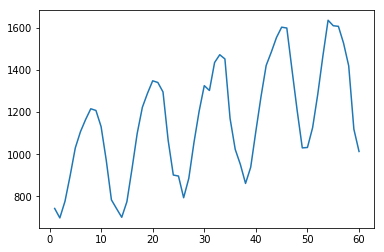

In [24]:
plt.figure()

plt.plot(plastic)

In [25]:
Trend = plastic.rolling(2, center = True).mean().rolling(12,center = True).mean()


In [26]:
res_seasonal  = plastic - Trend
res_seasonal

,x
Month,
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,239.041667
9,230.958333


In [27]:
res_seasonal_zero = np.nan_to_num(res_seasonal)

res_seasonal_zero

array([[   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [ 239.04166667],
       [ 230.95833333],
       [ 153.91666667],
       [  -7.41666667],
       [-199.70833333],
       [-249.41666667],
       [-300.45833333],
       [-237.20833333],
       [ -90.29166667],
       [  64.29166667],
       [ 177.45833333],
       [ 235.58333333],
       [ 283.20833333],
       [ 264.875     ],
       [ 211.375     ],
       [ -28.375     ],
       [-202.875     ],
       [-216.54166667],
       [-324.375     ],
       [-236.54166667],
       [ -75.66666667],
       [  61.29166667],
       [ 172.41666667],
       [ 140.        ],
       [ 265.625     ],
       [ 297.5       ],
       [ 272.45833333],
       [ -15.        ],
       [-167.16666667],
       [-246.08333333],
       [-347.70833333],
       [-283.29166667],
       [-122.70833333],
       [  30.70833333],
       [ 162.875

In [28]:
monthly_S = np.reshape(res_seasonal_zero, (5,12))
monthly_S


array([[   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,  239.04166667,
         230.95833333,  153.91666667,   -7.41666667, -199.70833333],
       [-249.41666667, -300.45833333, -237.20833333,  -90.29166667,
          64.29166667,  177.45833333,  235.58333333,  283.20833333,
         264.875     ,  211.375     ,  -28.375     , -202.875     ],
       [-216.54166667, -324.375     , -236.54166667,  -75.66666667,
          61.29166667,  172.41666667,  140.        ,  265.625     ,
         297.5       ,  272.45833333,  -15.        , -167.16666667],
       [-246.08333333, -347.70833333, -283.29166667, -122.70833333,
          30.70833333,  162.875     ,  209.41666667,  267.375     ,
         305.95833333,  287.        ,   74.83333333, -134.58333333],
       [-330.625     , -342.79166667, -256.20833333,  -96.25      ,
          97.41666667,  285.75      ,  279.75      ,    0.        ,
           0.        ,    0.        ,    0. 

In [29]:
monthly_avg = np.mean(monthly_S[1:4,:], axis=0)
monthly_avg

array([-237.34722222, -324.18055556, -252.34722222,  -96.22222222,
         52.09722222,  170.91666667,  195.        ,  272.06944444,
        289.44444444,  256.94444444,   10.48611111, -168.20833333])

In [30]:
mean_allmonth = monthly_avg.mean()
mean_allmonth

14.054398148148136

In [31]:
monthly_avg_normalized = monthly_avg - mean_allmonth
monthly_avg_normalized

array([-251.40162037, -338.2349537 , -266.40162037, -110.27662037,
         38.04282407,  156.86226852,  180.94560185,  258.0150463 ,
        275.3900463 ,  242.8900463 ,   -3.56828704, -182.26273148])

In [32]:
tiled_avg = np.tile(monthly_avg_normalized, 5)
tiled_avg

array([-251.40162037, -338.2349537 , -266.40162037, -110.27662037,
         38.04282407,  156.86226852,  180.94560185,  258.0150463 ,
        275.3900463 ,  242.8900463 ,   -3.56828704, -182.26273148,
       -251.40162037, -338.2349537 , -266.40162037, -110.27662037,
         38.04282407,  156.86226852,  180.94560185,  258.0150463 ,
        275.3900463 ,  242.8900463 ,   -3.56828704, -182.26273148,
       -251.40162037, -338.2349537 , -266.40162037, -110.27662037,
         38.04282407,  156.86226852,  180.94560185,  258.0150463 ,
        275.3900463 ,  242.8900463 ,   -3.56828704, -182.26273148,
       -251.40162037, -338.2349537 , -266.40162037, -110.27662037,
         38.04282407,  156.86226852,  180.94560185,  258.0150463 ,
        275.3900463 ,  242.8900463 ,   -3.56828704, -182.26273148,
       -251.40162037, -338.2349537 , -266.40162037, -110.27662037,
         38.04282407,  156.86226852,  180.94560185,  258.0150463 ,
        275.3900463 ,  242.8900463 ,   -3.56828704, -182.26273

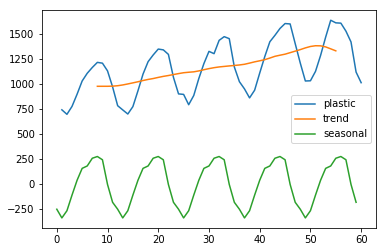

In [33]:
plt.figure()

plt.plot(plastic)
plt.plot(Trend)
plt.plot(tiled_avg)

plt.legend(["plastic","trend","seasonal"])

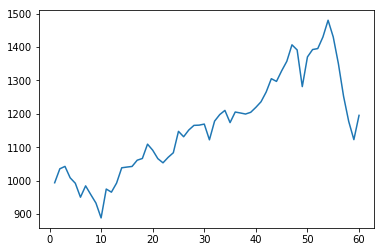

In [34]:
seasonally_adjusted = plastic['x'] - tiled_avg


plt.figure()

plt.plot(seasonally_adjusted)

In [35]:
outliner = 40
plastic.iloc[outliner,0] += 500


       Passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000


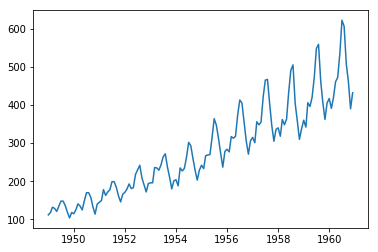

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#(a)
data_time  = pd.read_csv("Airline.csv",parse_dates=[['Month', 'Year']],
                         index_col = "Month_Year" ) 

print(data_time.describe())

plt.figure()
plt.plot(data_time)

data = pd.read_csv("Airline.csv") 
passenger = data["Passengers"]

In [37]:
passenger

0      112
1      118
2      132
3      129
4      121
5      135
6      148
7      148
8      136
9      119
10     104
11     118
12     115
13     126
14     141
15     135
16     125
17     149
18     170
19     170
20     158
21     133
22     114
23     140
24     145
25     150
26     178
27     163
28     172
29     178
      ... 
114    491
115    505
116    404
117    359
118    310
119    337
120    360
121    342
122    406
123    396
124    420
125    472
126    548
127    559
128    463
129    407
130    362
131    405
132    417
133    391
134    419
135    461
136    472
137    535
138    622
139    606
140    508
141    461
142    390
143    432
Name: Passengers, Length: 144, dtype: int64

In [38]:
def holt(y, alpha, beta):
    
#    l = [ y[:12].mean() ]
    l = [y[0]]
#    b = [  (sum(y[12:24])-sum(y[:12]))/144 ]
    b = [y[1] - y[0]]

    holtsmoothed = []
    
    Y = y.tolist()
    
    for i in range(len(Y)): 
            
        l.append(alpha * Y[i] + (1 - alpha) * (l[i] + b[i]))
        b.append(beta * (l[i+1] - l[i]) + (1 - beta) * b[i])
        holtsmoothed.append(l[i] + b[i])
    
    return holtsmoothed

holtsmoothed = holt(passenger,0.2,0.2)

In [39]:
holt(passenger,0.2,0.2)


[118,
 122.56000000000002,
 127.22560000000003,
 133.949056,
 138.52985856000004,
 139.89330626560002,
 143.58833217945605,
 149.3208196233626,
 153.85397679355336,
 154.3663434579638,
 149.96158305117365,
 141.59931140369457,
 136.76552162956352,
 131.42786894507617,
 129.14063203968323,
 130.78521723378154,
 131.0694766997089,
 129.05410520446247,
 133.03964380008682,
 141.90648892458282,
 150.12370546719632,
 154.61253048259925,
 152.33908927561765,
 145.18677273900764,
 144.45744860015932,
 144.89569134507434,
 146.45045788720336,
 154.55625280541844,
 158.37863862777377,
 163.78140174054707,
 169.8723561611438,
 180.1102254511755,
 189.05611186515384,
 193.01057652173034,
 190.53372518612235,
 183.57089511019103,
 181.29779524503834,
 180.0674035431147,
 180.88039403985118,
 184.6155706756463,
 185.05908915725658,
 185.73154037625451,
 194.5602397364027,
 205.44078963506513,
 218.00759796859248,
 221.10074071667069,
 218.7712252864664,
 211.23676393084432,
 208.9197242891129,
 206

In [40]:
passenger

0      112
1      118
2      132
3      129
4      121
5      135
6      148
7      148
8      136
9      119
10     104
11     118
12     115
13     126
14     141
15     135
16     125
17     149
18     170
19     170
20     158
21     133
22     114
23     140
24     145
25     150
26     178
27     163
28     172
29     178
      ... 
114    491
115    505
116    404
117    359
118    310
119    337
120    360
121    342
122    406
123    396
124    420
125    472
126    548
127    559
128    463
129    407
130    362
131    405
132    417
133    391
134    419
135    461
136    472
137    535
138    622
139    606
140    508
141    461
142    390
143    432
Name: Passengers, Length: 144, dtype: int64

Text(0.5, 1.0, "Holt's linear smoothing")

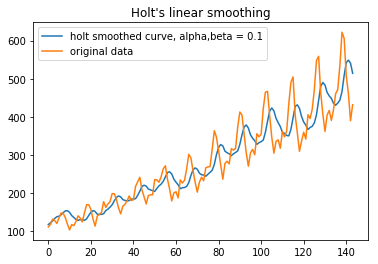

In [41]:
fig = plt.figure()
plt.plot(holtsmoothed, label = "holt smoothed curve, alpha,beta = 0.1")
plt.plot(passenger, label="original data")
plt.legend()
plt.title("Holt's linear smoothing")

In [42]:
def sse(x,y):
    return np.sum(np.power(x-y,2))

alphas = [ 0.2, 0.4, 0.6, 0.8]
betas = [0.2, 0.4, 0.6, 0.8]
sse_one = []
count = 0

In [43]:
for alpha in alphas:
    for beta in betas:
        smoothed = holt(passenger,alpha,beta)
        SSE2 = sse(smoothed[1:], passenger.values[1:])
        
        print("No",count, " Alpha =", alpha, " beta =", beta, " see =",SSE2)
        sse_one.append(SSE2)
        count+=1

No 0  Alpha = 0.2  beta = 0.2  see = 385699.9546965389
No 1  Alpha = 0.2  beta = 0.4  see = 501214.3970617966
No 2  Alpha = 0.2  beta = 0.6  see = 677326.4312423128
No 3  Alpha = 0.2  beta = 0.8  see = 929271.7253860813
No 4  Alpha = 0.4  beta = 0.2  see = 362118.7885454591
No 5  Alpha = 0.4  beta = 0.4  see = 455074.09956835065
No 6  Alpha = 0.4  beta = 0.6  see = 484925.46427962516
No 7  Alpha = 0.4  beta = 0.8  see = 446636.8568082174
No 8  Alpha = 0.6  beta = 0.2  see = 279621.0397200142
No 9  Alpha = 0.6  beta = 0.4  see = 306124.0357311964
No 10  Alpha = 0.6  beta = 0.6  see = 305720.3022862595
No 11  Alpha = 0.6  beta = 0.8  see = 307503.6253420318
No 12  Alpha = 0.8  beta = 0.2  see = 221150.36735079423
No 13  Alpha = 0.8  beta = 0.4  see = 234433.9684530703
No 14  Alpha = 0.8  beta = 0.6  see = 238104.4806781474
No 15  Alpha = 0.8  beta = 0.8  see = 240015.77578349557


In [44]:
print("The index of least sse: ",np.argmin(sse_one))

#Alpha = 0.8  beta = 0.2 

The index of least sse:  12


Text(0, 0.5, 'Num of passengers')

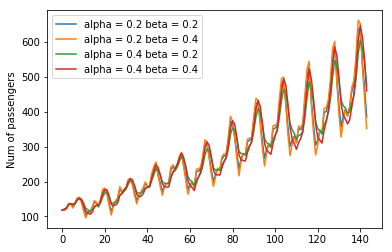

In [45]:
smoothed1 = holt(passenger,0.8,0.2) 
smoothed2 = holt(passenger,0.8,0.4) 
smoothed3 = holt(passenger,0.4,0.2) 
smoothed4 = holt(passenger,0.4,0.4) 

plt.figure()
plt.plot(smoothed1,label = "alpha = 0.2 beta = 0.2" )
plt.plot(smoothed2,label = "alpha = 0.2 beta = 0.4" )
plt.plot(smoothed3,label = "alpha = 0.4 beta = 0.2" )
plt.plot(smoothed4,label = "alpha = 0.4 beta = 0.4" )
plt.title("")
plt.legend()
plt.ylabel("Num of passengers")


In [46]:
sse_two = []
alphas2 = np.arange(0.01,1,0.01)
betas2 = np.arange(0.01,1,0.01)
count = 0

In [47]:
len(alphas2)
len(betas2)

99

In [48]:
def holt_2(y, alpha, beta):
    
    l = [ y[:12].mean() ]
    #l = [y[0]]
    b = [  (sum(y[12:24])-sum(y[:12]))/144 ]
    #b = [y[1] - y[0]]
    holtsmoothed = []
    
    Y = y.tolist()
    
    for i in range(len(Y)+4):
        if i == len(Y) - 1:
            Y.append(l[-1] + 2*b[-1])
            
        l.append(alpha * Y[i] + (1 - alpha) * (l[i] + b[i]))
        b.append(beta * (l[i+1] - l[i]) + (1 - beta) * b[i])
        holtsmoothed.append(l[i] + 2*b[i])
    
    return holtsmoothed

In [49]:
for alpha in alphas2:
    for beta in betas2:
        smoothed2 = holt_2(passenger,alpha,beta)
#        SSE2 = sse(smoothed2[2:-4], passenger.values[2:])
        SSE2 = sse(smoothed2[2:-4], passenger.values[2:])
        print("No ",count, "Alpha =", alpha, " beta =", beta, " see =",SSE2 )
        sse_two.append(SSE2)
        count += 1
        

No  0 Alpha = 0.01  beta = 0.01  see = 829713.2635644356
No  1 Alpha = 0.01  beta = 0.02  see = 718089.857997771
No  2 Alpha = 0.01  beta = 0.03  see = 629156.9912019161
No  3 Alpha = 0.01  beta = 0.04  see = 558825.3996777064
No  4 Alpha = 0.01  beta = 0.05  see = 503621.1709833211
No  5 Alpha = 0.01  beta = 0.060000000000000005  see = 460616.72595035005
No  6 Alpha = 0.01  beta = 0.06999999999999999  see = 427365.08740629285
No  7 Alpha = 0.01  beta = 0.08  see = 401838.27754532755
No  8 Alpha = 0.01  beta = 0.09  see = 382370.38904500706
No  9 Alpha = 0.01  beta = 0.09999999999999999  see = 367605.63269474125
No  10 Alpha = 0.01  beta = 0.11  see = 356451.4702053704
No  11 Alpha = 0.01  beta = 0.12  see = 348036.7887896916
No  12 Alpha = 0.01  beta = 0.13  see = 341674.9581892333
No  13 Alpha = 0.01  beta = 0.14  see = 336831.52565688186
No  14 Alpha = 0.01  beta = 0.15000000000000002  see = 333096.245046114
No  15 Alpha = 0.01  beta = 0.16  see = 330159.0981559591
No  16 Alpha = 0.

No  135 Alpha = 0.02  beta = 0.37  see = 332254.07567630766
No  136 Alpha = 0.02  beta = 0.38  see = 334499.81773529516
No  137 Alpha = 0.02  beta = 0.39  see = 336829.56854440423
No  138 Alpha = 0.02  beta = 0.4  see = 339237.5379295184
No  139 Alpha = 0.02  beta = 0.41000000000000003  see = 341717.3812561594
No  140 Alpha = 0.02  beta = 0.42000000000000004  see = 344262.06572725985
No  141 Alpha = 0.02  beta = 0.43  see = 346863.73761529726
No  142 Alpha = 0.02  beta = 0.44  see = 349513.60724267334
No  143 Alpha = 0.02  beta = 0.45  see = 352201.86632399925
No  144 Alpha = 0.02  beta = 0.46  see = 354917.64907968417
No  145 Alpha = 0.02  beta = 0.47000000000000003  see = 357649.0447232004
No  146 Alpha = 0.02  beta = 0.48000000000000004  see = 360383.164889372
No  147 Alpha = 0.02  beta = 0.49  see = 363106.2656327428
No  148 Alpha = 0.02  beta = 0.5  see = 365803.92004753114
No  149 Alpha = 0.02  beta = 0.51  see = 368461.23453865526
No  150 Alpha = 0.02  beta = 0.52  see = 371063.

No  269 Alpha = 0.03  beta = 0.72  see = 365179.77832267067
No  270 Alpha = 0.03  beta = 0.73  see = 364878.01970132475
No  271 Alpha = 0.03  beta = 0.74  see = 364608.7186291814
No  272 Alpha = 0.03  beta = 0.75  see = 364373.97395643743
No  273 Alpha = 0.03  beta = 0.76  see = 364175.69298087014
No  274 Alpha = 0.03  beta = 0.77  see = 364015.5640548215
No  275 Alpha = 0.03  beta = 0.78  see = 363895.03386233
No  276 Alpha = 0.03  beta = 0.79  see = 363815.2904176733
No  277 Alpha = 0.03  beta = 0.8  see = 363777.2523670263
No  278 Alpha = 0.03  beta = 0.81  see = 363781.56476183224
No  279 Alpha = 0.03  beta = 0.8200000000000001  see = 363828.601127247
No  280 Alpha = 0.03  beta = 0.8300000000000001  see = 363918.4713767395
No  281 Alpha = 0.03  beta = 0.8400000000000001  see = 364051.0349242482
No  282 Alpha = 0.03  beta = 0.85  see = 364225.9182140415
No  283 Alpha = 0.03  beta = 0.86  see = 364442.5358182437
No  284 Alpha = 0.03  beta = 0.87  see = 364700.1142334364
No  285 Alpha

No  407 Alpha = 0.05  beta = 0.12  see = 318526.8765048288
No  408 Alpha = 0.05  beta = 0.13  see = 320699.7601472189
No  409 Alpha = 0.05  beta = 0.14  see = 322994.3988613159
No  410 Alpha = 0.05  beta = 0.15000000000000002  see = 325387.35690949706
No  411 Alpha = 0.05  beta = 0.16  see = 327851.24930705957
No  412 Alpha = 0.05  beta = 0.17  see = 330354.9737777345
No  413 Alpha = 0.05  beta = 0.18000000000000002  see = 332864.5022541742
No  414 Alpha = 0.05  beta = 0.19  see = 335344.1591734559
No  415 Alpha = 0.05  beta = 0.2  see = 337758.30820821977
No  416 Alpha = 0.05  beta = 0.21000000000000002  see = 340073.29435349716
No  417 Alpha = 0.05  beta = 0.22  see = 342259.41023387614
No  418 Alpha = 0.05  beta = 0.23  see = 344292.62230677705
No  419 Alpha = 0.05  beta = 0.24000000000000002  see = 346155.8218526273
No  420 Alpha = 0.05  beta = 0.25  see = 347839.44737596135
No  421 Alpha = 0.05  beta = 0.26  see = 349341.4336070358
No  422 Alpha = 0.05  beta = 0.27  see = 350666.5

No  546 Alpha = 0.060000000000000005  beta = 0.52  see = 379936.98525351845
No  547 Alpha = 0.060000000000000005  beta = 0.53  see = 381631.4679951365
No  548 Alpha = 0.060000000000000005  beta = 0.54  see = 383371.11977316753
No  549 Alpha = 0.060000000000000005  beta = 0.55  see = 385155.1227769243
No  550 Alpha = 0.060000000000000005  beta = 0.56  see = 386982.68690231844
No  551 Alpha = 0.060000000000000005  beta = 0.5700000000000001  see = 388853.0345259759
No  552 Alpha = 0.060000000000000005  beta = 0.5800000000000001  see = 390765.37985791237
No  553 Alpha = 0.060000000000000005  beta = 0.59  see = 392718.90516945167
No  554 Alpha = 0.060000000000000005  beta = 0.6  see = 394712.7360412658
No  555 Alpha = 0.060000000000000005  beta = 0.61  see = 396745.917535933
No  556 Alpha = 0.060000000000000005  beta = 0.62  see = 398817.39290252107
No  557 Alpha = 0.060000000000000005  beta = 0.63  see = 400925.98609651893
No  558 Alpha = 0.060000000000000005  beta = 0.64  see = 403070.389

No  686 Alpha = 0.06999999999999999  beta = 0.93  see = 512948.525476133
No  687 Alpha = 0.06999999999999999  beta = 0.9400000000000001  see = 516235.7159345567
No  688 Alpha = 0.06999999999999999  beta = 0.9500000000000001  see = 519554.3798132145
No  689 Alpha = 0.06999999999999999  beta = 0.9600000000000001  see = 522905.4998074187
No  690 Alpha = 0.06999999999999999  beta = 0.97  see = 526290.1354652497
No  691 Alpha = 0.06999999999999999  beta = 0.98  see = 529709.4267836199
No  692 Alpha = 0.06999999999999999  beta = 0.99  see = 533164.5948612829
No  693 Alpha = 0.08  beta = 0.01  see = 319478.7680973237
No  694 Alpha = 0.08  beta = 0.02  see = 311891.17060106795
No  695 Alpha = 0.08  beta = 0.03  see = 310449.74414942996
No  696 Alpha = 0.08  beta = 0.04  see = 311229.31594144827
No  697 Alpha = 0.08  beta = 0.05  see = 312886.08956931037
No  698 Alpha = 0.08  beta = 0.060000000000000005  see = 314946.7372301766
No  699 Alpha = 0.08  beta = 0.06999999999999999  see = 317228.1247

No  817 Alpha = 0.09  beta = 0.26  see = 362938.2874690378
No  818 Alpha = 0.09  beta = 0.27  see = 365085.1840971462
No  819 Alpha = 0.09  beta = 0.28  see = 367275.52925996156
No  820 Alpha = 0.09  beta = 0.29000000000000004  see = 369513.4479186745
No  821 Alpha = 0.09  beta = 0.3  see = 371802.1399920047
No  822 Alpha = 0.09  beta = 0.31  see = 374143.98107693007
No  823 Alpha = 0.09  beta = 0.32  see = 376540.6266384726
No  824 Alpha = 0.09  beta = 0.33  see = 378993.11537751893
No  825 Alpha = 0.09  beta = 0.34  see = 381501.9667447547
No  826 Alpha = 0.09  beta = 0.35000000000000003  see = 384067.2682072841
No  827 Alpha = 0.09  beta = 0.36000000000000004  see = 386688.74944944703
No  828 Alpha = 0.09  beta = 0.37  see = 389365.84264695615
No  829 Alpha = 0.09  beta = 0.38  see = 392097.7298127248
No  830 Alpha = 0.09  beta = 0.39  see = 394883.3796486291
No  831 Alpha = 0.09  beta = 0.4  see = 397721.57719234796
No  832 Alpha = 0.09  beta = 0.41000000000000003  see = 400610.949

No  939 Alpha = 0.09999999999999999  beta = 0.49  see = 443525.93715074763
No  940 Alpha = 0.09999999999999999  beta = 0.5  see = 447335.73346048617
No  941 Alpha = 0.09999999999999999  beta = 0.51  see = 451192.72645593795
No  942 Alpha = 0.09999999999999999  beta = 0.52  see = 455097.9659503803
No  943 Alpha = 0.09999999999999999  beta = 0.53  see = 459052.70533009246
No  944 Alpha = 0.09999999999999999  beta = 0.54  see = 463058.364020666
No  945 Alpha = 0.09999999999999999  beta = 0.55  see = 467116.48858570814
No  946 Alpha = 0.09999999999999999  beta = 0.56  see = 471228.71506821504
No  947 Alpha = 0.09999999999999999  beta = 0.5700000000000001  see = 475396.7348488902
No  948 Alpha = 0.09999999999999999  beta = 0.5800000000000001  see = 479622.26579512743
No  949 Alpha = 0.09999999999999999  beta = 0.59  see = 483907.02987145714
No  950 Alpha = 0.09999999999999999  beta = 0.6  see = 488252.7377437961
No  951 Alpha = 0.09999999999999999  beta = 0.61  see = 492661.08029924607
No  

No  1080 Alpha = 0.11  beta = 0.91  see = 728862.0536825962
No  1081 Alpha = 0.11  beta = 0.92  see = 737848.7737653285
No  1082 Alpha = 0.11  beta = 0.93  see = 746990.4189818101
No  1083 Alpha = 0.11  beta = 0.9400000000000001  see = 756289.9613459433
No  1084 Alpha = 0.11  beta = 0.9500000000000001  see = 765750.5541003641
No  1085 Alpha = 0.11  beta = 0.9600000000000001  see = 775375.5434888973
No  1086 Alpha = 0.11  beta = 0.97  see = 785168.4796454879
No  1087 Alpha = 0.11  beta = 0.98  see = 795133.1265730796
No  1088 Alpha = 0.11  beta = 0.99  see = 805273.4711870091
No  1089 Alpha = 0.12  beta = 0.01  see = 312991.24289241165
No  1090 Alpha = 0.12  beta = 0.02  see = 311891.3000897407
No  1091 Alpha = 0.12  beta = 0.03  see = 313587.05439189856
No  1092 Alpha = 0.12  beta = 0.04  see = 316174.2499690718
No  1093 Alpha = 0.12  beta = 0.05  see = 319083.82159520005
No  1094 Alpha = 0.12  beta = 0.060000000000000005  see = 322127.4202038756
No  1095 Alpha = 0.12  beta = 0.0699999

No  1213 Alpha = 0.13  beta = 0.26  see = 391910.99801846466
No  1214 Alpha = 0.13  beta = 0.27  see = 395816.98615480383
No  1215 Alpha = 0.13  beta = 0.28  see = 399796.0931419159
No  1216 Alpha = 0.13  beta = 0.29000000000000004  see = 403848.8919975171
No  1217 Alpha = 0.13  beta = 0.3  see = 407975.79662136215
No  1218 Alpha = 0.13  beta = 0.31  see = 412177.153434049
No  1219 Alpha = 0.13  beta = 0.32  see = 416453.3247404595
No  1220 Alpha = 0.13  beta = 0.33  see = 420804.76216023404
No  1221 Alpha = 0.13  beta = 0.34  see = 425232.06834118237
No  1222 Alpha = 0.13  beta = 0.35000000000000003  see = 429736.0452752644
No  1223 Alpha = 0.13  beta = 0.36000000000000004  see = 434317.7279478402
No  1224 Alpha = 0.13  beta = 0.37  see = 438978.4027550203
No  1225 Alpha = 0.13  beta = 0.38  see = 443719.61103250214
No  1226 Alpha = 0.13  beta = 0.39  see = 448543.13901771524
No  1227 Alpha = 0.13  beta = 0.4  see = 453450.99646762
No  1228 Alpha = 0.13  beta = 0.41000000000000003  se

No  1462 Alpha = 0.15000000000000002  beta = 0.77  see = 828455.7672769508
No  1463 Alpha = 0.15000000000000002  beta = 0.78  see = 842115.7838266133
No  1464 Alpha = 0.15000000000000002  beta = 0.79  see = 856078.8373948873
No  1465 Alpha = 0.15000000000000002  beta = 0.8  see = 870352.9930807212
No  1466 Alpha = 0.15000000000000002  beta = 0.81  see = 884946.5138701942
No  1467 Alpha = 0.15000000000000002  beta = 0.8200000000000001  see = 899867.8405350063
No  1468 Alpha = 0.15000000000000002  beta = 0.8300000000000001  see = 915125.568948174
No  1469 Alpha = 0.15000000000000002  beta = 0.8400000000000001  see = 930728.425015117
No  1470 Alpha = 0.15000000000000002  beta = 0.85  see = 946685.237440747
No  1471 Alpha = 0.15000000000000002  beta = 0.86  see = 963004.9085661746
No  1472 Alpha = 0.15000000000000002  beta = 0.87  see = 979696.3835109198
No  1473 Alpha = 0.15000000000000002  beta = 0.88  see = 996768.6178474714
No  1474 Alpha = 0.15000000000000002  beta = 0.89  see = 10142

No  1588 Alpha = 0.17  beta = 0.05  see = 324259.90026492125
No  1589 Alpha = 0.17  beta = 0.060000000000000005  see = 328289.1565559753
No  1590 Alpha = 0.17  beta = 0.06999999999999999  see = 332360.4330192258
No  1591 Alpha = 0.17  beta = 0.08  see = 336465.26998779917
No  1592 Alpha = 0.17  beta = 0.09  see = 340601.7777702834
No  1593 Alpha = 0.17  beta = 0.09999999999999999  see = 344771.89706424816
No  1594 Alpha = 0.17  beta = 0.11  see = 348980.0491071056
No  1595 Alpha = 0.17  beta = 0.12  see = 353232.18429884344
No  1596 Alpha = 0.17  beta = 0.13  see = 357535.0478718276
No  1597 Alpha = 0.17  beta = 0.14  see = 361895.63701573224
No  1598 Alpha = 0.17  beta = 0.15000000000000002  see = 366320.82691726804
No  1599 Alpha = 0.17  beta = 0.16  see = 370817.131815644
No  1600 Alpha = 0.17  beta = 0.17  see = 375390.5677224903
No  1601 Alpha = 0.17  beta = 0.18000000000000002  see = 380046.59102462267
No  1602 Alpha = 0.17  beta = 0.19  see = 384790.09447242727
No  1603 Alpha = 

No  1712 Alpha = 0.18000000000000002  beta = 0.3  see = 452107.2451429237
No  1713 Alpha = 0.18000000000000002  beta = 0.31  see = 458645.3567170676
No  1714 Alpha = 0.18000000000000002  beta = 0.32  see = 465332.1650528262
No  1715 Alpha = 0.18000000000000002  beta = 0.33  see = 472171.9153101527
No  1716 Alpha = 0.18000000000000002  beta = 0.34  see = 479168.87427228986
No  1717 Alpha = 0.18000000000000002  beta = 0.35000000000000003  see = 486327.31408358563
No  1718 Alpha = 0.18000000000000002  beta = 0.36000000000000004  see = 493651.5008328096
No  1719 Alpha = 0.18000000000000002  beta = 0.37  see = 501145.6883207326
No  1720 Alpha = 0.18000000000000002  beta = 0.38  see = 508814.1167138407
No  1721 Alpha = 0.18000000000000002  beta = 0.39  see = 516661.01535733027
No  1722 Alpha = 0.18000000000000002  beta = 0.4  see = 524690.6088029343
No  1723 Alpha = 0.18000000000000002  beta = 0.41000000000000003  see = 532907.1250726043
No  1724 Alpha = 0.18000000000000002  beta = 0.4200000

No  1833 Alpha = 0.19  beta = 0.52  see = 658906.2876242565
No  1834 Alpha = 0.19  beta = 0.53  see = 670567.8639150538
No  1835 Alpha = 0.19  beta = 0.54  see = 682496.9184490237
No  1836 Alpha = 0.19  beta = 0.55  see = 694698.9406409368
No  1837 Alpha = 0.19  beta = 0.56  see = 707179.5135217106
No  1838 Alpha = 0.19  beta = 0.5700000000000001  see = 719944.3031684116
No  1839 Alpha = 0.19  beta = 0.5800000000000001  see = 732999.0441066038
No  1840 Alpha = 0.19  beta = 0.59  see = 746349.5203984415
No  1841 Alpha = 0.19  beta = 0.6  see = 760001.5421998246
No  1842 Alpha = 0.19  beta = 0.61  see = 773960.9176453535
No  1843 Alpha = 0.19  beta = 0.62  see = 788233.4199970934
No  1844 Alpha = 0.19  beta = 0.63  see = 802824.750068897
No  1845 Alpha = 0.19  beta = 0.64  see = 817740.4940088792
No  1846 Alpha = 0.19  beta = 0.65  see = 832986.0765860693
No  1847 Alpha = 0.19  beta = 0.66  see = 848566.7101809295
No  1848 Alpha = 0.19  beta = 0.67  see = 864487.3397217459
No  1849 Alpha

No  2083 Alpha = 0.22  beta = 0.05  see = 325435.5856460174
No  2084 Alpha = 0.22  beta = 0.060000000000000005  see = 330327.9797939535
No  2085 Alpha = 0.22  beta = 0.06999999999999999  see = 335289.9443132797
No  2086 Alpha = 0.22  beta = 0.08  see = 340323.8812750367
No  2087 Alpha = 0.22  beta = 0.09  see = 345433.9861861272
No  2088 Alpha = 0.22  beta = 0.09999999999999999  see = 350625.45632979955
No  2089 Alpha = 0.22  beta = 0.11  see = 355904.1553403969
No  2090 Alpha = 0.22  beta = 0.12  see = 361276.36602923943
No  2091 Alpha = 0.22  beta = 0.13  see = 366748.57941549225
No  2092 Alpha = 0.22  beta = 0.14  see = 372327.322329215
No  2093 Alpha = 0.22  beta = 0.15000000000000002  see = 378019.0297159405
No  2094 Alpha = 0.22  beta = 0.16  see = 383829.9633851075
No  2095 Alpha = 0.22  beta = 0.17  see = 389766.1737157743
No  2096 Alpha = 0.22  beta = 0.18000000000000002  see = 395833.49640663114
No  2097 Alpha = 0.22  beta = 0.19  see = 402037.5736834096
No  2098 Alpha = 0.22

No  2216 Alpha = 0.23  beta = 0.39  see = 571918.7511725351
No  2217 Alpha = 0.23  beta = 0.4  see = 582570.4307179401
No  2218 Alpha = 0.23  beta = 0.41000000000000003  see = 593468.3877302036
No  2219 Alpha = 0.23  beta = 0.42000000000000004  see = 604616.0126546063
No  2220 Alpha = 0.23  beta = 0.43  see = 616016.5641213995
No  2221 Alpha = 0.23  beta = 0.44  see = 627673.1506137141
No  2222 Alpha = 0.23  beta = 0.45  see = 639588.7076302125
No  2223 Alpha = 0.23  beta = 0.46  see = 651765.9700578657
No  2224 Alpha = 0.23  beta = 0.47000000000000003  see = 664207.4395166107
No  2225 Alpha = 0.23  beta = 0.48000000000000004  see = 676915.3465003725
No  2226 Alpha = 0.23  beta = 0.49  see = 689891.6072170552
No  2227 Alpha = 0.23  beta = 0.5  see = 703137.775120935
No  2228 Alpha = 0.23  beta = 0.51  see = 716654.987230593
No  2229 Alpha = 0.23  beta = 0.52  see = 730443.9054297917
No  2230 Alpha = 0.23  beta = 0.53  see = 744504.6530531164
No  2231 Alpha = 0.23  beta = 0.54  see = 75

No  2344 Alpha = 0.24000000000000002  beta = 0.68  see = 995407.630150037
No  2345 Alpha = 0.24000000000000002  beta = 0.6900000000000001  see = 1012324.8414083229
No  2346 Alpha = 0.24000000000000002  beta = 0.7000000000000001  see = 1029251.9379297136
No  2347 Alpha = 0.24000000000000002  beta = 0.7100000000000001  see = 1046161.4123607203
No  2348 Alpha = 0.24000000000000002  beta = 0.72  see = 1063024.306114584
No  2349 Alpha = 0.24000000000000002  beta = 0.73  see = 1079810.2915478789
No  2350 Alpha = 0.24000000000000002  beta = 0.74  see = 1096487.772842806
No  2351 Alpha = 0.24000000000000002  beta = 0.75  see = 1113024.0059129389
No  2352 Alpha = 0.24000000000000002  beta = 0.76  see = 1129385.2373731658
No  2353 Alpha = 0.24000000000000002  beta = 0.77  see = 1145536.8623023008
No  2354 Alpha = 0.24000000000000002  beta = 0.78  see = 1161443.6001840737
No  2355 Alpha = 0.24000000000000002  beta = 0.79  see = 1177069.6880454915
No  2356 Alpha = 0.24000000000000002  beta = 0.8  

No  2474 Alpha = 0.25  beta = 0.99  see = 1304328.708734763
No  2475 Alpha = 0.26  beta = 0.01  see = 302937.8289732987
No  2476 Alpha = 0.26  beta = 0.02  see = 307557.6589352623
No  2477 Alpha = 0.26  beta = 0.03  see = 312651.257378983
No  2478 Alpha = 0.26  beta = 0.04  see = 317887.276116558
No  2479 Alpha = 0.26  beta = 0.05  see = 323211.10140433104
No  2480 Alpha = 0.26  beta = 0.060000000000000005  see = 328619.55993225536
No  2481 Alpha = 0.26  beta = 0.06999999999999999  see = 334117.72533656633
No  2482 Alpha = 0.26  beta = 0.08  see = 339711.5193399377
No  2483 Alpha = 0.26  beta = 0.09  see = 345406.8766102969
No  2484 Alpha = 0.26  beta = 0.09999999999999999  see = 351209.8553465381
No  2485 Alpha = 0.26  beta = 0.11  see = 357126.7296748166
No  2486 Alpha = 0.26  beta = 0.12  see = 363163.9725459458
No  2487 Alpha = 0.26  beta = 0.13  see = 369328.17384908174
No  2488 Alpha = 0.26  beta = 0.14  see = 375625.940228068
No  2489 Alpha = 0.26  beta = 0.15000000000000002  se

No  2605 Alpha = 0.27  beta = 0.32  see = 521402.5499046795
No  2606 Alpha = 0.27  beta = 0.33  see = 531413.8679271719
No  2607 Alpha = 0.27  beta = 0.34  see = 541643.4905354122
No  2608 Alpha = 0.27  beta = 0.35000000000000003  see = 552092.0834431937
No  2609 Alpha = 0.27  beta = 0.36000000000000004  see = 562759.9014419315
No  2610 Alpha = 0.27  beta = 0.37  see = 573646.7599556478
No  2611 Alpha = 0.27  beta = 0.38  see = 584752.00179829
No  2612 Alpha = 0.27  beta = 0.39  see = 596074.459086462
No  2613 Alpha = 0.27  beta = 0.4  see = 607612.4103837386
No  2614 Alpha = 0.27  beta = 0.41000000000000003  see = 619363.5332785841
No  2615 Alpha = 0.27  beta = 0.42000000000000004  see = 631324.852727752
No  2616 Alpha = 0.27  beta = 0.43  see = 643492.6856301386
No  2617 Alpha = 0.27  beta = 0.44  see = 655862.58223075
No  2618 Alpha = 0.27  beta = 0.45  see = 668429.2650874131
No  2619 Alpha = 0.27  beta = 0.46  see = 681186.5664607971
No  2620 Alpha = 0.27  beta = 0.470000000000000

No  2734 Alpha = 0.28  beta = 0.62  see = 894414.903844638
No  2735 Alpha = 0.28  beta = 0.63  see = 907163.8963042739
No  2736 Alpha = 0.28  beta = 0.64  see = 919710.6897333299
No  2737 Alpha = 0.28  beta = 0.65  see = 932027.1191252018
No  2738 Alpha = 0.28  beta = 0.66  see = 944084.952469521
No  2739 Alpha = 0.28  beta = 0.67  see = 955856.0834739802
No  2740 Alpha = 0.28  beta = 0.68  see = 967312.7324235034
No  2741 Alpha = 0.28  beta = 0.6900000000000001  see = 978427.652699296
No  2742 Alpha = 0.28  beta = 0.7000000000000001  see = 989174.3402363631
No  2743 Alpha = 0.28  beta = 0.7100000000000001  see = 999527.2430044299
No  2744 Alpha = 0.28  beta = 0.72  see = 1009461.9674632457
No  2745 Alpha = 0.28  beta = 0.73  see = 1018955.4788773548
No  2746 Alpha = 0.28  beta = 0.74  see = 1027986.2923831483
No  2747 Alpha = 0.28  beta = 0.75  see = 1036534.6517859537
No  2748 Alpha = 0.28  beta = 0.76  see = 1044582.6932276017
No  2749 Alpha = 0.28  beta = 0.77  see = 1052114.591102

No  2855 Alpha = 0.29000000000000004  beta = 0.8400000000000001  see = 1041628.0539315791
No  2856 Alpha = 0.29000000000000004  beta = 0.85  see = 1043198.3310207019
No  2857 Alpha = 0.29000000000000004  beta = 0.86  see = 1044280.6253052054
No  2858 Alpha = 0.29000000000000004  beta = 0.87  see = 1044887.9819177663
No  2859 Alpha = 0.29000000000000004  beta = 0.88  see = 1045035.0299041627
No  2860 Alpha = 0.29000000000000004  beta = 0.89  see = 1044737.8291085953
No  2861 Alpha = 0.29000000000000004  beta = 0.9  see = 1044013.7111873506
No  2862 Alpha = 0.29000000000000004  beta = 0.91  see = 1042881.1171943268
No  2863 Alpha = 0.29000000000000004  beta = 0.92  see = 1041359.4340648145
No  2864 Alpha = 0.29000000000000004  beta = 0.93  see = 1039468.8321658475
No  2865 Alpha = 0.29000000000000004  beta = 0.9400000000000001  see = 1037230.1058905623
No  2866 Alpha = 0.29000000000000004  beta = 0.9500000000000001  see = 1034664.5190588179
No  2867 Alpha = 0.29000000000000004  beta = 0.

No  2987 Alpha = 0.31  beta = 0.18000000000000002  see = 402000.937474517
No  2988 Alpha = 0.31  beta = 0.19  see = 409609.32396318973
No  2989 Alpha = 0.31  beta = 0.2  see = 417391.0917243778
No  2990 Alpha = 0.31  beta = 0.21000000000000002  see = 425349.1477908935
No  2991 Alpha = 0.31  beta = 0.22  see = 433485.89906768117
No  2992 Alpha = 0.31  beta = 0.23  see = 441803.23826869304
No  2993 Alpha = 0.31  beta = 0.24000000000000002  see = 450302.5308158706
No  2994 Alpha = 0.31  beta = 0.25  see = 458984.60209774674
No  2995 Alpha = 0.31  beta = 0.26  see = 467849.72448207584
No  2996 Alpha = 0.31  beta = 0.27  see = 476897.6034396521
No  2997 Alpha = 0.31  beta = 0.28  see = 486127.36212671496
No  2998 Alpha = 0.31  beta = 0.29000000000000004  see = 495537.5238184144
No  2999 Alpha = 0.31  beta = 0.3  see = 505125.99168802827
No  3000 Alpha = 0.31  beta = 0.31  see = 514890.0255749391
No  3001 Alpha = 0.31  beta = 0.32  see = 524826.2155629969
No  3002 Alpha = 0.31  beta = 0.33  

No  3232 Alpha = 0.33  beta = 0.65  see = 830299.0603848293
No  3233 Alpha = 0.33  beta = 0.66  see = 835803.6733488876
No  3234 Alpha = 0.33  beta = 0.67  see = 840910.4813875252
No  3235 Alpha = 0.33  beta = 0.68  see = 845615.9356933504
No  3236 Alpha = 0.33  beta = 0.6900000000000001  see = 849918.3595542449
No  3237 Alpha = 0.33  beta = 0.7000000000000001  see = 853817.9361490833
No  3238 Alpha = 0.33  beta = 0.7100000000000001  see = 857316.6770545616
No  3239 Alpha = 0.33  beta = 0.72  see = 860418.3724792027
No  3240 Alpha = 0.33  beta = 0.73  see = 863128.5245592104
No  3241 Alpha = 0.33  beta = 0.74  see = 865454.2653221118
No  3242 Alpha = 0.33  beta = 0.75  see = 867404.2611420801
No  3243 Alpha = 0.33  beta = 0.76  see = 868988.6056721875
No  3244 Alpha = 0.33  beta = 0.77  see = 870218.7033423282
No  3245 Alpha = 0.33  beta = 0.78  see = 871107.1455583447
No  3246 Alpha = 0.33  beta = 0.79  see = 871667.5817310564
No  3247 Alpha = 0.33  beta = 0.8  see = 871914.587207949


No  3365 Alpha = 0.34  beta = 0.99  see = 808227.2297155355
No  3366 Alpha = 0.35000000000000003  beta = 0.01  see = 286669.50983450335
No  3367 Alpha = 0.35000000000000003  beta = 0.02  see = 292130.1119043187
No  3368 Alpha = 0.35000000000000003  beta = 0.03  see = 297788.4276563482
No  3369 Alpha = 0.35000000000000003  beta = 0.04  see = 303522.09772552754
No  3370 Alpha = 0.35000000000000003  beta = 0.05  see = 309334.51703722734
No  3371 Alpha = 0.35000000000000003  beta = 0.060000000000000005  see = 315240.2206945977
No  3372 Alpha = 0.35000000000000003  beta = 0.06999999999999999  see = 321250.0869481631
No  3373 Alpha = 0.35000000000000003  beta = 0.08  see = 327371.72330791934
No  3374 Alpha = 0.35000000000000003  beta = 0.09  see = 333611.01405640756
No  3375 Alpha = 0.35000000000000003  beta = 0.09999999999999999  see = 339973.0590978379
No  3376 Alpha = 0.35000000000000003  beta = 0.11  see = 346462.586686102
No  3377 Alpha = 0.35000000000000003  beta = 0.12  see = 353084.0

No  3490 Alpha = 0.36000000000000004  beta = 0.26  see = 458214.73730988795
No  3491 Alpha = 0.36000000000000004  beta = 0.27  see = 466881.29045817634
No  3492 Alpha = 0.36000000000000004  beta = 0.28  see = 475659.57389234303
No  3493 Alpha = 0.36000000000000004  beta = 0.29000000000000004  see = 484542.0139323737
No  3494 Alpha = 0.36000000000000004  beta = 0.3  see = 493520.21356424957
No  3495 Alpha = 0.36000000000000004  beta = 0.31  see = 502584.94767405733
No  3496 Alpha = 0.36000000000000004  beta = 0.32  see = 511726.1607520011
No  3497 Alpha = 0.36000000000000004  beta = 0.33  see = 520932.96806554956
No  3498 Alpha = 0.36000000000000004  beta = 0.34  see = 530193.6613946628
No  3499 Alpha = 0.36000000000000004  beta = 0.35000000000000003  see = 539495.7204710619
No  3500 Alpha = 0.36000000000000004  beta = 0.36000000000000004  see = 548825.8312659501
No  3501 Alpha = 0.36000000000000004  beta = 0.37  see = 558169.9122257802
No  3502 Alpha = 0.36000000000000004  beta = 0.38 

No  3612 Alpha = 0.37  beta = 0.49  see = 653444.1189195968
No  3613 Alpha = 0.37  beta = 0.5  see = 660811.7178360675
No  3614 Alpha = 0.37  beta = 0.51  see = 667941.8596549744
No  3615 Alpha = 0.37  beta = 0.52  see = 674821.2984507522
No  3616 Alpha = 0.37  beta = 0.53  see = 681437.8623758724
No  3617 Alpha = 0.37  beta = 0.54  see = 687780.5608029019
No  3618 Alpha = 0.37  beta = 0.55  see = 693839.6797243942
No  3619 Alpha = 0.37  beta = 0.56  see = 699606.8637758022
No  3620 Alpha = 0.37  beta = 0.5700000000000001  see = 705075.1835219659
No  3621 Alpha = 0.37  beta = 0.5800000000000001  see = 710239.1869597344
No  3622 Alpha = 0.37  beta = 0.59  see = 715094.9345272318
No  3623 Alpha = 0.37  beta = 0.6  see = 719640.0172628501
No  3624 Alpha = 0.37  beta = 0.61  see = 723873.5581120863
No  3625 Alpha = 0.37  beta = 0.62  see = 727796.1967264472
No  3626 Alpha = 0.37  beta = 0.63  see = 731410.058424585
No  3627 Alpha = 0.37  beta = 0.64  see = 734718.7082821013
No  3628 Alpha 

No  3746 Alpha = 0.38  beta = 0.8400000000000001  see = 729700.8723625777
No  3747 Alpha = 0.38  beta = 0.85  see = 729343.8233967524
No  3748 Alpha = 0.38  beta = 0.86  see = 728970.3611802806
No  3749 Alpha = 0.38  beta = 0.87  see = 728591.3245793377
No  3750 Alpha = 0.38  beta = 0.88  see = 728217.1117223428
No  3751 Alpha = 0.38  beta = 0.89  see = 727857.6708708694
No  3752 Alpha = 0.38  beta = 0.9  see = 727522.4953720869
No  3753 Alpha = 0.38  beta = 0.91  see = 727220.622265761
No  3754 Alpha = 0.38  beta = 0.92  see = 726960.6341285022
No  3755 Alpha = 0.38  beta = 0.93  see = 726750.6637528717
No  3756 Alpha = 0.38  beta = 0.9400000000000001  see = 726598.4012780044
No  3757 Alpha = 0.38  beta = 0.9500000000000001  see = 726511.1034104399
No  3758 Alpha = 0.38  beta = 0.9600000000000001  see = 726495.604398063
No  3759 Alpha = 0.38  beta = 0.97  see = 726558.3284454497
No  3760 Alpha = 0.38  beta = 0.98  see = 726705.3032850327
No  3761 Alpha = 0.38  beta = 0.99  see = 72694

No  3924 Alpha = 0.4  beta = 0.64  see = 676486.6207741133
No  3925 Alpha = 0.4  beta = 0.65  see = 678598.1142277961
No  3926 Alpha = 0.4  beta = 0.66  see = 680510.0846054937
No  3927 Alpha = 0.4  beta = 0.67  see = 682233.0960331182
No  3928 Alpha = 0.4  beta = 0.68  see = 683778.2252991602
No  3929 Alpha = 0.4  beta = 0.6900000000000001  see = 685156.9687428117
No  3930 Alpha = 0.4  beta = 0.7000000000000001  see = 686381.1516252315
No  3931 Alpha = 0.4  beta = 0.7100000000000001  see = 687462.8409627515
No  3932 Alpha = 0.4  beta = 0.72  see = 688414.262645886
No  3933 Alpha = 0.4  beta = 0.73  see = 689247.72351222
No  3934 Alpha = 0.4  beta = 0.74  see = 689975.5388888469
No  3935 Alpha = 0.4  beta = 0.75  see = 690609.9659747536
No  3936 Alpha = 0.4  beta = 0.76  see = 691163.1432981527
No  3937 Alpha = 0.4  beta = 0.77  see = 691647.036360518
No  3938 Alpha = 0.4  beta = 0.78  see = 692073.3894692236
No  3939 Alpha = 0.4  beta = 0.79  see = 692453.6836652347
No  3940 Alpha = 0

No  4083 Alpha = 0.42000000000000004  beta = 0.25  see = 427144.19226598716
No  4084 Alpha = 0.42000000000000004  beta = 0.26  see = 434691.3611072528
No  4085 Alpha = 0.42000000000000004  beta = 0.27  see = 442269.9262981645
No  4086 Alpha = 0.42000000000000004  beta = 0.28  see = 449869.0829580176
No  4087 Alpha = 0.42000000000000004  beta = 0.29000000000000004  see = 457477.4537191307
No  4088 Alpha = 0.42000000000000004  beta = 0.3  see = 465083.1417710563
No  4089 Alpha = 0.42000000000000004  beta = 0.31  see = 472673.79004702554
No  4090 Alpha = 0.42000000000000004  beta = 0.32  see = 480236.6469071217
No  4091 Alpha = 0.42000000000000004  beta = 0.33  see = 487758.6385262839
No  4092 Alpha = 0.42000000000000004  beta = 0.34  see = 495226.44800889306
No  4093 Alpha = 0.42000000000000004  beta = 0.35000000000000003  see = 502626.6010349657
No  4094 Alpha = 0.42000000000000004  beta = 0.36000000000000004  see = 509945.55760649376
No  4095 Alpha = 0.42000000000000004  beta = 0.37  s

No  4206 Alpha = 0.43  beta = 0.49  see = 580414.9510699466
No  4207 Alpha = 0.43  beta = 0.5  see = 585062.564489808
No  4208 Alpha = 0.43  beta = 0.51  see = 589497.9097478339
No  4209 Alpha = 0.43  beta = 0.52  see = 593720.8995559631
No  4210 Alpha = 0.43  beta = 0.53  see = 597732.5805129173
No  4211 Alpha = 0.43  beta = 0.54  see = 601535.103520008
No  4212 Alpha = 0.43  beta = 0.55  see = 605131.6833116944
No  4213 Alpha = 0.43  beta = 0.56  see = 608526.5481527593
No  4214 Alpha = 0.43  beta = 0.5700000000000001  see = 611724.8808996485
No  4215 Alpha = 0.43  beta = 0.5800000000000001  see = 614732.7527290224
No  4216 Alpha = 0.43  beta = 0.59  see = 617557.0509014913
No  4217 Alpha = 0.43  beta = 0.6  see = 620205.4019539527
No  4218 Alpha = 0.43  beta = 0.61  see = 622686.0917025247
No  4219 Alpha = 0.43  beta = 0.62  see = 625007.9833934881
No  4220 Alpha = 0.43  beta = 0.63  see = 627180.4352665049
No  4221 Alpha = 0.43  beta = 0.64  see = 629213.2186977889
No  4222 Alpha =

No  4454 Alpha = 0.45  beta = 0.99  see = 680027.012600783
No  4455 Alpha = 0.46  beta = 0.01  see = 260820.4317751813
No  4456 Alpha = 0.46  beta = 0.02  see = 266238.886697288
No  4457 Alpha = 0.46  beta = 0.03  see = 271703.7940028078
No  4458 Alpha = 0.46  beta = 0.04  see = 277190.8139452168
No  4459 Alpha = 0.46  beta = 0.05  see = 282725.4355132215
No  4460 Alpha = 0.46  beta = 0.060000000000000005  see = 288326.0913635897
No  4461 Alpha = 0.46  beta = 0.06999999999999999  see = 294002.664872374
No  4462 Alpha = 0.46  beta = 0.08  see = 299760.1005605637
No  4463 Alpha = 0.46  beta = 0.09  see = 305600.7886578425
No  4464 Alpha = 0.46  beta = 0.09999999999999999  see = 311525.7415034496
No  4465 Alpha = 0.46  beta = 0.11  see = 317535.0909070017
No  4466 Alpha = 0.46  beta = 0.12  see = 323628.25445560494
No  4467 Alpha = 0.46  beta = 0.13  see = 329803.95767044224
No  4468 Alpha = 0.46  beta = 0.14  see = 336060.20539432357
No  4469 Alpha = 0.46  beta = 0.15000000000000002  see

No  4585 Alpha = 0.47000000000000003  beta = 0.32  see = 449660.7072258646
No  4586 Alpha = 0.47000000000000003  beta = 0.33  see = 455914.81030998117
No  4587 Alpha = 0.47000000000000003  beta = 0.34  see = 462075.87292093044
No  4588 Alpha = 0.47000000000000003  beta = 0.35000000000000003  see = 468134.1546931054
No  4589 Alpha = 0.47000000000000003  beta = 0.36000000000000004  see = 474080.383283176
No  4590 Alpha = 0.47000000000000003  beta = 0.37  see = 479905.83779631794
No  4591 Alpha = 0.47000000000000003  beta = 0.38  see = 485602.4276693805
No  4592 Alpha = 0.47000000000000003  beta = 0.39  see = 491162.7657306665
No  4593 Alpha = 0.47000000000000003  beta = 0.4  see = 496580.2342199341
No  4594 Alpha = 0.47000000000000003  beta = 0.41000000000000003  see = 501849.04265992646
No  4595 Alpha = 0.47000000000000003  beta = 0.42000000000000004  see = 506964.2766180201
No  4596 Alpha = 0.47000000000000003  beta = 0.43  see = 511921.9365775875
No  4597 Alpha = 0.47000000000000003  

No  4801 Alpha = 0.49  beta = 0.5  see = 523701.7722381107
No  4802 Alpha = 0.49  beta = 0.51  see = 527195.6819298066
No  4803 Alpha = 0.49  beta = 0.52  see = 530567.8623828593
No  4804 Alpha = 0.49  beta = 0.53  see = 533824.1180841397
No  4805 Alpha = 0.49  beta = 0.54  see = 536970.7474892999
No  4806 Alpha = 0.49  beta = 0.55  see = 540014.4799109027
No  4807 Alpha = 0.49  beta = 0.56  see = 542962.4121047803
No  4808 Alpha = 0.49  beta = 0.5700000000000001  see = 545821.9454340468
No  4809 Alpha = 0.49  beta = 0.5800000000000001  see = 548600.7243974493
No  4810 Alpha = 0.49  beta = 0.59  see = 551306.5772074428
No  4811 Alpha = 0.49  beta = 0.6  see = 553947.4589974885
No  4812 Alpha = 0.49  beta = 0.61  see = 556531.3981312382
No  4813 Alpha = 0.49  beta = 0.62  see = 559066.445981598
No  4814 Alpha = 0.49  beta = 0.63  see = 561560.6304477962
No  4815 Alpha = 0.49  beta = 0.64  see = 564021.9133855047
No  4816 Alpha = 0.49  beta = 0.65  see = 566458.1520403477
No  4817 Alpha 

No  5018 Alpha = 0.51  beta = 0.6900000000000001  see = 562574.7107738019
No  5019 Alpha = 0.51  beta = 0.7000000000000001  see = 565354.149251878
No  5020 Alpha = 0.51  beta = 0.7100000000000001  see = 568165.1962974638
No  5021 Alpha = 0.51  beta = 0.72  see = 571013.0109663178
No  5022 Alpha = 0.51  beta = 0.73  see = 573902.4750255112
No  5023 Alpha = 0.51  beta = 0.74  see = 576838.1892210454
No  5024 Alpha = 0.51  beta = 0.75  see = 579824.4712007706
No  5025 Alpha = 0.51  beta = 0.76  see = 582865.3548809923
No  5026 Alpha = 0.51  beta = 0.77  see = 585964.5910564559
No  5027 Alpha = 0.51  beta = 0.78  see = 589125.6490661659
No  5028 Alpha = 0.51  beta = 0.79  see = 592351.7193412267
No  5029 Alpha = 0.51  beta = 0.8  see = 595645.7166752224
No  5030 Alpha = 0.51  beta = 0.81  see = 599010.2840722031
No  5031 Alpha = 0.51  beta = 0.8200000000000001  see = 602447.7970419154
No  5032 Alpha = 0.51  beta = 0.8300000000000001  see = 605960.3682261626
No  5033 Alpha = 0.51  beta = 0.

No  5234 Alpha = 0.53  beta = 0.87  see = 615807.1065742837
No  5235 Alpha = 0.53  beta = 0.88  see = 620027.2506301356
No  5236 Alpha = 0.53  beta = 0.89  see = 624319.6168342558
No  5237 Alpha = 0.53  beta = 0.9  see = 628683.7180661769
No  5238 Alpha = 0.53  beta = 0.91  see = 633118.8543700237
No  5239 Alpha = 0.53  beta = 0.92  see = 637624.1173471641
No  5240 Alpha = 0.53  beta = 0.93  see = 642198.3945116118
No  5241 Alpha = 0.53  beta = 0.9400000000000001  see = 646840.3736221782
No  5242 Alpha = 0.53  beta = 0.9500000000000001  see = 651548.5470095605
No  5243 Alpha = 0.53  beta = 0.9600000000000001  see = 656321.2159200927
No  5244 Alpha = 0.53  beta = 0.97  see = 661156.4949008569
No  5245 Alpha = 0.53  beta = 0.98  see = 666052.3162532358
No  5246 Alpha = 0.53  beta = 0.99  see = 671006.4345838128
No  5247 Alpha = 0.54  beta = 0.01  see = 241590.90543385904
No  5248 Alpha = 0.54  beta = 0.02  see = 246681.0591583833
No  5249 Alpha = 0.54  beta = 0.03  see = 251759.348726775

No  5430 Alpha = 0.55  beta = 0.85  see = 602558.83224359
No  5431 Alpha = 0.55  beta = 0.86  see = 606860.6259067063
No  5432 Alpha = 0.55  beta = 0.87  see = 611223.645049451
No  5433 Alpha = 0.55  beta = 0.88  see = 615647.0245657448
No  5434 Alpha = 0.55  beta = 0.89  see = 620129.6930298985
No  5435 Alpha = 0.55  beta = 0.9  see = 624670.3777618126
No  5436 Alpha = 0.55  beta = 0.91  see = 629267.6099791047
No  5437 Alpha = 0.55  beta = 0.92  see = 633919.7300495292
No  5438 Alpha = 0.55  beta = 0.93  see = 638624.8928602564
No  5439 Alpha = 0.55  beta = 0.9400000000000001  see = 643381.0733230669
No  5440 Alpha = 0.55  beta = 0.9500000000000001  see = 648186.0720364224
No  5441 Alpha = 0.55  beta = 0.9600000000000001  see = 653037.5211266316
No  5442 Alpha = 0.55  beta = 0.97  see = 657932.8902910097
No  5443 Alpha = 0.55  beta = 0.98  see = 662869.493066009
No  5444 Alpha = 0.55  beta = 0.99  see = 667844.4933428733
No  5445 Alpha = 0.56  beta = 0.01  see = 236959.24214249742
No

No  5560 Alpha = 0.5700000000000001  beta = 0.17  see = 316549.32871090074
No  5561 Alpha = 0.5700000000000001  beta = 0.18000000000000002  see = 321909.6644976937
No  5562 Alpha = 0.5700000000000001  beta = 0.19  see = 327274.35259053623
No  5563 Alpha = 0.5700000000000001  beta = 0.2  see = 332636.9533858014
No  5564 Alpha = 0.5700000000000001  beta = 0.21000000000000002  see = 337990.8556583197
No  5565 Alpha = 0.5700000000000001  beta = 0.22  see = 343329.3526749384
No  5566 Alpha = 0.5700000000000001  beta = 0.23  see = 348645.7186261155
No  5567 Alpha = 0.5700000000000001  beta = 0.24000000000000002  see = 353933.28422188025
No  5568 Alpha = 0.5700000000000001  beta = 0.25  see = 359185.5104765783
No  5569 Alpha = 0.5700000000000001  beta = 0.26  see = 364396.05982476694
No  5570 Alpha = 0.5700000000000001  beta = 0.27  see = 369558.8637866644
No  5571 Alpha = 0.5700000000000001  beta = 0.28  see = 374668.1864532955
No  5572 Alpha = 0.5700000000000001  beta = 0.29000000000000004 

No  5684 Alpha = 0.5800000000000001  beta = 0.42000000000000004  see = 433260.56621693325
No  5685 Alpha = 0.5800000000000001  beta = 0.43  see = 437208.5973484492
No  5686 Alpha = 0.5800000000000001  beta = 0.44  see = 441091.7563323843
No  5687 Alpha = 0.5800000000000001  beta = 0.45  see = 444913.56155754713
No  5688 Alpha = 0.5800000000000001  beta = 0.46  see = 448677.86385633145
No  5689 Alpha = 0.5800000000000001  beta = 0.47000000000000003  see = 452388.802743819
No  5690 Alpha = 0.5800000000000001  beta = 0.48000000000000004  see = 456050.7623067569
No  5691 Alpha = 0.5800000000000001  beta = 0.49  see = 459668.3273499692
No  5692 Alpha = 0.5800000000000001  beta = 0.5  see = 463246.2403434728
No  5693 Alpha = 0.5800000000000001  beta = 0.51  see = 466789.3596437846
No  5694 Alpha = 0.5800000000000001  beta = 0.52  see = 470302.6193903616
No  5695 Alpha = 0.5800000000000001  beta = 0.53  see = 473790.9914052628
No  5696 Alpha = 0.5800000000000001  beta = 0.54  see = 477259.449

No  5921 Alpha = 0.6  beta = 0.81  see = 572341.7165993751
No  5922 Alpha = 0.6  beta = 0.8200000000000001  see = 576703.950539631
No  5923 Alpha = 0.6  beta = 0.8300000000000001  see = 581100.8821876568
No  5924 Alpha = 0.6  beta = 0.8400000000000001  see = 585530.9195047016
No  5925 Alpha = 0.6  beta = 0.85  see = 589992.3046808008
No  5926 Alpha = 0.6  beta = 0.86  see = 594483.1217116744
No  5927 Alpha = 0.6  beta = 0.87  see = 599001.3042535357
No  5928 Alpha = 0.6  beta = 0.88  see = 603544.6437536264
No  5929 Alpha = 0.6  beta = 0.89  see = 608110.7978545013
No  5930 Alpha = 0.6  beta = 0.9  see = 612697.2990697678
No  5931 Alpha = 0.6  beta = 0.91  see = 617301.5637280717
No  5932 Alpha = 0.6  beta = 0.92  see = 621920.9011807757
No  5933 Alpha = 0.6  beta = 0.93  see = 626552.5232669637
No  5934 Alpha = 0.6  beta = 0.9400000000000001  see = 631193.554027218
No  5935 Alpha = 0.6  beta = 0.9500000000000001  see = 635841.0396550898
No  5936 Alpha = 0.6  beta = 0.9600000000000001 

No  6156 Alpha = 0.63  beta = 0.19  see = 307240.66379557806
No  6157 Alpha = 0.63  beta = 0.2  see = 312119.11029040907
No  6158 Alpha = 0.63  beta = 0.21000000000000002  see = 316984.32896635105
No  6159 Alpha = 0.63  beta = 0.22  see = 321831.4358312633
No  6160 Alpha = 0.63  beta = 0.23  see = 326655.69707739865
No  6161 Alpha = 0.63  beta = 0.24000000000000002  see = 331452.587701081
No  6162 Alpha = 0.63  beta = 0.25  see = 336217.84528072976
No  6163 Alpha = 0.63  beta = 0.26  see = 340947.5183276683
No  6164 Alpha = 0.63  beta = 0.27  see = 345638.00875607703
No  6165 Alpha = 0.63  beta = 0.28  see = 350286.1081316072
No  6166 Alpha = 0.63  beta = 0.29000000000000004  see = 354889.0274617262
No  6167 Alpha = 0.63  beta = 0.3  see = 359444.4203908223
No  6168 Alpha = 0.63  beta = 0.31  see = 363950.39976254763
No  6169 Alpha = 0.63  beta = 0.32  see = 368405.5476115553
No  6170 Alpha = 0.63  beta = 0.33  see = 372808.91874568054
No  6171 Alpha = 0.63  beta = 0.34  see = 377160.0

No  6285 Alpha = 0.64  beta = 0.49  see = 433155.22972410044
No  6286 Alpha = 0.64  beta = 0.5  see = 436943.6967818487
No  6287 Alpha = 0.64  beta = 0.51  see = 440724.36423239886
No  6288 Alpha = 0.64  beta = 0.52  see = 444500.4736174271
No  6289 Alpha = 0.64  beta = 0.53  see = 448275.1809812314
No  6290 Alpha = 0.64  beta = 0.54  see = 452051.53643488535
No  6291 Alpha = 0.64  beta = 0.55  see = 455832.4658173359
No  6292 Alpha = 0.64  beta = 0.56  see = 459620.75441968197
No  6293 Alpha = 0.64  beta = 0.5700000000000001  see = 463419.0327160429
No  6294 Alpha = 0.64  beta = 0.5800000000000001  see = 467229.7640263988
No  6295 Alpha = 0.64  beta = 0.59  see = 471055.2340231348
No  6296 Alpha = 0.64  beta = 0.6  see = 474897.5419833628
No  6297 Alpha = 0.64  beta = 0.61  see = 478758.5936829204
No  6298 Alpha = 0.64  beta = 0.62  see = 482640.09582482575
No  6299 Alpha = 0.64  beta = 0.63  see = 486543.5518943869
No  6300 Alpha = 0.64  beta = 0.64  see = 490470.2593347185
No  6301 

No  6495 Alpha = 0.66  beta = 0.61  see = 472363.3977078248
No  6496 Alpha = 0.66  beta = 0.62  see = 476321.7497150076
No  6497 Alpha = 0.66  beta = 0.63  see = 480299.2585465554
No  6498 Alpha = 0.66  beta = 0.64  see = 484296.645064263
No  6499 Alpha = 0.66  beta = 0.65  see = 488314.43828629516
No  6500 Alpha = 0.66  beta = 0.66  see = 492352.976693835
No  6501 Alpha = 0.66  beta = 0.67  see = 496412.4104559108
No  6502 Alpha = 0.66  beta = 0.68  see = 500492.70449877693
No  6503 Alpha = 0.66  beta = 0.6900000000000001  see = 504593.6423516002
No  6504 Alpha = 0.66  beta = 0.7000000000000001  see = 508714.83070556936
No  6505 Alpha = 0.66  beta = 0.7100000000000001  see = 512855.70462863485
No  6506 Alpha = 0.66  beta = 0.72  see = 517015.5333828934
No  6507 Alpha = 0.66  beta = 0.73  see = 521193.4267960286
No  6508 Alpha = 0.66  beta = 0.74  see = 525388.342142135
No  6509 Alpha = 0.66  beta = 0.75  see = 529599.0914907032
No  6510 Alpha = 0.66  beta = 0.76  see = 533824.34948543

No  6740 Alpha = 0.6900000000000001  beta = 0.09  see = 244514.52266089193
No  6741 Alpha = 0.6900000000000001  beta = 0.09999999999999999  see = 248955.954142562
No  6742 Alpha = 0.6900000000000001  beta = 0.11  see = 253421.3071911906
No  6743 Alpha = 0.6900000000000001  beta = 0.12  see = 257908.12828278478
No  6744 Alpha = 0.6900000000000001  beta = 0.13  see = 262413.59926625347
No  6745 Alpha = 0.6900000000000001  beta = 0.14  see = 266934.61365541245
No  6746 Alpha = 0.6900000000000001  beta = 0.15000000000000002  see = 271467.8358560513
No  6747 Alpha = 0.6900000000000001  beta = 0.16  see = 276009.7569841734
No  6748 Alpha = 0.6900000000000001  beta = 0.17  see = 280556.7515555918
No  6749 Alpha = 0.6900000000000001  beta = 0.18000000000000002  see = 285105.1353138027
No  6750 Alpha = 0.6900000000000001  beta = 0.19  see = 289651.2229989884
No  6751 Alpha = 0.6900000000000001  beta = 0.2  see = 294191.38453883387
No  6752 Alpha = 0.6900000000000001  beta = 0.21000000000000002 

No  6847 Alpha = 0.7000000000000001  beta = 0.17  see = 277953.22479462484
No  6848 Alpha = 0.7000000000000001  beta = 0.18000000000000002  see = 282455.286327491
No  6849 Alpha = 0.7000000000000001  beta = 0.19  see = 286955.6855239143
No  6850 Alpha = 0.7000000000000001  beta = 0.2  see = 291450.9866789781
No  6851 Alpha = 0.7000000000000001  beta = 0.21000000000000002  see = 295937.86887562484
No  6852 Alpha = 0.7000000000000001  beta = 0.22  see = 300413.1723829747
No  6853 Alpha = 0.7000000000000001  beta = 0.23  see = 304873.94004528684
No  6854 Alpha = 0.7000000000000001  beta = 0.24000000000000002  see = 309317.45316802035
No  6855 Alpha = 0.7000000000000001  beta = 0.25  see = 313741.2616119637
No  6856 Alpha = 0.7000000000000001  beta = 0.26  see = 318143.20797082124
No  6857 Alpha = 0.7000000000000001  beta = 0.27  see = 322521.4458403835
No  6858 Alpha = 0.7000000000000001  beta = 0.28  see = 326874.45229638054
No  6859 Alpha = 0.7000000000000001  beta = 0.29000000000000004

No  6961 Alpha = 0.7100000000000001  beta = 0.32  see = 340973.71298992465
No  6962 Alpha = 0.7100000000000001  beta = 0.33  see = 345174.03576783126
No  6963 Alpha = 0.7100000000000001  beta = 0.34  see = 349349.5892518269
No  6964 Alpha = 0.7100000000000001  beta = 0.35000000000000003  see = 353501.040351966
No  6965 Alpha = 0.7100000000000001  beta = 0.36000000000000004  see = 357629.28645480436
No  6966 Alpha = 0.7100000000000001  beta = 0.37  see = 361735.4323769825
No  6967 Alpha = 0.7100000000000001  beta = 0.38  see = 365820.7660151996
No  6968 Alpha = 0.7100000000000001  beta = 0.39  see = 369886.73314906884
No  6969 Alpha = 0.7100000000000001  beta = 0.4  see = 373934.9118225336
No  6970 Alpha = 0.7100000000000001  beta = 0.41000000000000003  see = 377966.98669333
No  6971 Alpha = 0.7100000000000001  beta = 0.42000000000000004  see = 381984.7236999561
No  6972 Alpha = 0.7100000000000001  beta = 0.43  see = 385989.9453531921
No  6973 Alpha = 0.7100000000000001  beta = 0.44  se

No  7083 Alpha = 0.72  beta = 0.55  see = 430947.99878933735
No  7084 Alpha = 0.72  beta = 0.56  see = 434959.2664370833
No  7085 Alpha = 0.72  beta = 0.5700000000000001  see = 438977.63712756295
No  7086 Alpha = 0.72  beta = 0.5800000000000001  see = 443003.5413883769
No  7087 Alpha = 0.72  beta = 0.59  see = 447037.2694160509
No  7088 Alpha = 0.72  beta = 0.6  see = 451078.97132564755
No  7089 Alpha = 0.72  beta = 0.61  see = 455128.65843022947
No  7090 Alpha = 0.72  beta = 0.62  see = 459186.2054768158
No  7091 Alpha = 0.72  beta = 0.63  see = 463251.3537669786
No  7092 Alpha = 0.72  beta = 0.64  see = 467323.71509211935
No  7093 Alpha = 0.72  beta = 0.65  see = 471402.77641557687
No  7094 Alpha = 0.72  beta = 0.66  see = 475487.905235955
No  7095 Alpha = 0.72  beta = 0.67  see = 479578.3555682966
No  7096 Alpha = 0.72  beta = 0.68  see = 483673.27448189154
No  7097 Alpha = 0.72  beta = 0.6900000000000001  see = 487771.70913556713
No  7098 Alpha = 0.72  beta = 0.7000000000000001  se

No  7293 Alpha = 0.74  beta = 0.67  see = 474308.0615351712
No  7294 Alpha = 0.74  beta = 0.68  see = 478382.38598820515
No  7295 Alpha = 0.74  beta = 0.6900000000000001  see = 482455.85486480506
No  7296 Alpha = 0.74  beta = 0.7000000000000001  see = 486527.40839645336
No  7297 Alpha = 0.74  beta = 0.7100000000000001  see = 490595.9301750902
No  7298 Alpha = 0.74  beta = 0.72  see = 494660.25537872117
No  7299 Alpha = 0.74  beta = 0.73  see = 498719.1791525429
No  7300 Alpha = 0.74  beta = 0.74  see = 502771.46509282384
No  7301 Alpha = 0.74  beta = 0.75  see = 506815.8537821038
No  7302 Alpha = 0.74  beta = 0.76  see = 510851.07132560015
No  7303 Alpha = 0.74  beta = 0.77  see = 514875.83784010797
No  7304 Alpha = 0.74  beta = 0.78  see = 518888.87584815733
No  7305 Alpha = 0.74  beta = 0.79  see = 522888.9185317566
No  7306 Alpha = 0.74  beta = 0.8  see = 526874.7178017849
No  7307 Alpha = 0.74  beta = 0.81  see = 530845.0521409452
No  7308 Alpha = 0.74  beta = 0.8200000000000001  s

No  7527 Alpha = 0.77  beta = 0.04  see = 207596.64433448098
No  7528 Alpha = 0.77  beta = 0.05  see = 211609.30396639518
No  7529 Alpha = 0.77  beta = 0.060000000000000005  see = 215636.22042442008
No  7530 Alpha = 0.77  beta = 0.06999999999999999  see = 219684.81775308854
No  7531 Alpha = 0.77  beta = 0.08  see = 223757.89958436787
No  7532 Alpha = 0.77  beta = 0.09  see = 227855.95709686988
No  7533 Alpha = 0.77  beta = 0.09999999999999999  see = 231978.2874782515
No  7534 Alpha = 0.77  beta = 0.11  see = 236123.52438850194
No  7535 Alpha = 0.77  beta = 0.12  see = 240289.8933997089
No  7536 Alpha = 0.77  beta = 0.13  see = 244475.3437784198
No  7537 Alpha = 0.77  beta = 0.14  see = 248677.62746676267
No  7538 Alpha = 0.77  beta = 0.15000000000000002  see = 252894.35708521368
No  7539 Alpha = 0.77  beta = 0.16  see = 257123.05617408073
No  7540 Alpha = 0.77  beta = 0.17  see = 261361.20630932177
No  7541 Alpha = 0.77  beta = 0.18000000000000002  see = 265606.29202429636
No  7542 Alp

No  7762 Alpha = 0.79  beta = 0.41000000000000003  see = 356754.2721464567
No  7763 Alpha = 0.79  beta = 0.42000000000000004  see = 360822.9922086949
No  7764 Alpha = 0.79  beta = 0.43  see = 364887.94102308294
No  7765 Alpha = 0.79  beta = 0.44  see = 368949.76038792724
No  7766 Alpha = 0.79  beta = 0.45  see = 373009.06025978614
No  7767 Alpha = 0.79  beta = 0.46  see = 377066.40853237995
No  7768 Alpha = 0.79  beta = 0.47000000000000003  see = 381122.32203559036
No  7769 Alpha = 0.79  beta = 0.48000000000000004  see = 385177.2587647135
No  7770 Alpha = 0.79  beta = 0.49  see = 389231.6113341851
No  7771 Alpha = 0.79  beta = 0.5  see = 393285.7016364116
No  7772 Alpha = 0.79  beta = 0.51  see = 397339.77667497075
No  7773 Alpha = 0.79  beta = 0.52  see = 401394.0055320548
No  7774 Alpha = 0.79  beta = 0.53  see = 405448.4774224486
No  7775 Alpha = 0.79  beta = 0.54  see = 409503.20078031725
No  7776 Alpha = 0.79  beta = 0.55  see = 413558.10332044563
No  7777 Alpha = 0.79  beta = 0.5

No  7984 Alpha = 0.81  beta = 0.65  see = 449681.18431990827
No  7985 Alpha = 0.81  beta = 0.66  see = 453701.7707063146
No  7986 Alpha = 0.81  beta = 0.67  see = 457715.2283104302
No  7987 Alpha = 0.81  beta = 0.68  see = 461720.9003488636
No  7988 Alpha = 0.81  beta = 0.6900000000000001  see = 465718.1338201606
No  7989 Alpha = 0.81  beta = 0.7000000000000001  see = 469706.2856688051
No  7990 Alpha = 0.81  beta = 0.7100000000000001  see = 473684.7288374183
No  7991 Alpha = 0.81  beta = 0.72  see = 477652.8581632969
No  7992 Alpha = 0.81  beta = 0.73  see = 481610.09607848094
No  7993 Alpha = 0.81  beta = 0.74  see = 485555.8980757361
No  7994 Alpha = 0.81  beta = 0.75  see = 489489.7579061332
No  7995 Alpha = 0.81  beta = 0.76  see = 493411.21247733734
No  7996 Alpha = 0.81  beta = 0.77  see = 497319.84642522736
No  7997 Alpha = 0.81  beta = 0.78  see = 501215.29633504053
No  7998 Alpha = 0.81  beta = 0.79  see = 505097.2545918799
No  7999 Alpha = 0.81  beta = 0.8  see = 508965.47284

No  8107 Alpha = 0.8200000000000001  beta = 0.89  see = 541163.1444028289
No  8108 Alpha = 0.8200000000000001  beta = 0.9  see = 544916.5888923346
No  8109 Alpha = 0.8200000000000001  beta = 0.91  see = 548660.6156846745
No  8110 Alpha = 0.8200000000000001  beta = 0.92  see = 552395.9176895925
No  8111 Alpha = 0.8200000000000001  beta = 0.93  see = 556123.2510380208
No  8112 Alpha = 0.8200000000000001  beta = 0.9400000000000001  see = 559843.4330657998
No  8113 Alpha = 0.8200000000000001  beta = 0.9500000000000001  see = 563557.3400851478
No  8114 Alpha = 0.8200000000000001  beta = 0.9600000000000001  see = 567265.904969515
No  8115 Alpha = 0.8200000000000001  beta = 0.97  see = 570970.1145777771
No  8116 Alpha = 0.8200000000000001  beta = 0.98  see = 574671.0070438443
No  8117 Alpha = 0.8200000000000001  beta = 0.99  see = 578369.6689576178
No  8118 Alpha = 0.8300000000000001  beta = 0.01  see = 186090.18187788542
No  8119 Alpha = 0.8300000000000001  beta = 0.02  see = 190015.46940917

No  8223 Alpha = 0.8400000000000001  beta = 0.06999999999999999  see = 207650.97466520913
No  8224 Alpha = 0.8400000000000001  beta = 0.08  see = 211520.33520536005
No  8225 Alpha = 0.8400000000000001  beta = 0.09  see = 215416.27560831993
No  8226 Alpha = 0.8400000000000001  beta = 0.09999999999999999  see = 219338.50399114293
No  8227 Alpha = 0.8400000000000001  beta = 0.11  see = 223286.10398153108
No  8228 Alpha = 0.8400000000000001  beta = 0.12  see = 227257.78515543512
No  8229 Alpha = 0.8400000000000001  beta = 0.13  see = 231252.0132797511
No  8230 Alpha = 0.8400000000000001  beta = 0.14  see = 235267.0871016861
No  8231 Alpha = 0.8400000000000001  beta = 0.15000000000000002  see = 239301.19204770605
No  8232 Alpha = 0.8400000000000001  beta = 0.16  see = 243352.4438635605
No  8233 Alpha = 0.8400000000000001  beta = 0.17  see = 247418.92719762423
No  8234 Alpha = 0.8400000000000001  beta = 0.18000000000000002  see = 251498.7306128394
No  8235 Alpha = 0.8400000000000001  beta = 

No  8354 Alpha = 0.85  beta = 0.39  see = 335973.2640206028
No  8355 Alpha = 0.85  beta = 0.4  see = 340074.78507294937
No  8356 Alpha = 0.85  beta = 0.41000000000000003  see = 344174.6424197013
No  8357 Alpha = 0.85  beta = 0.42000000000000004  see = 348272.9335041189
No  8358 Alpha = 0.85  beta = 0.43  see = 352369.74735949375
No  8359 Alpha = 0.85  beta = 0.44  see = 356465.1579799261
No  8360 Alpha = 0.85  beta = 0.45  see = 360559.2185997046
No  8361 Alpha = 0.85  beta = 0.46  see = 364651.95688974194
No  8362 Alpha = 0.85  beta = 0.47000000000000003  see = 368743.3710663908
No  8363 Alpha = 0.85  beta = 0.48000000000000004  see = 372833.42689664883
No  8364 Alpha = 0.85  beta = 0.49  see = 376922.05557408696
No  8365 Alpha = 0.85  beta = 0.5  see = 381009.1524317011
No  8366 Alpha = 0.85  beta = 0.51  see = 385094.5764511283
No  8367 Alpha = 0.85  beta = 0.52  see = 389178.15052215004
No  8368 Alpha = 0.85  beta = 0.53  see = 393259.6624020106
No  8369 Alpha = 0.85  beta = 0.54  

No  8600 Alpha = 0.87  beta = 0.87  see = 526413.9171061245
No  8601 Alpha = 0.87  beta = 0.88  see = 530371.8608263957
No  8602 Alpha = 0.87  beta = 0.89  see = 534332.6792934996
No  8603 Alpha = 0.87  beta = 0.9  see = 538297.3996818038
No  8604 Alpha = 0.87  beta = 0.91  see = 542267.0971652082
No  8605 Alpha = 0.87  beta = 0.92  see = 546242.8929110577
No  8606 Alpha = 0.87  beta = 0.93  see = 550225.9519975854
No  8607 Alpha = 0.87  beta = 0.9400000000000001  see = 554217.481275776
No  8608 Alpha = 0.87  beta = 0.9500000000000001  see = 558218.7271959322
No  8609 Alpha = 0.87  beta = 0.9600000000000001  see = 562230.9736184718
No  8610 Alpha = 0.87  beta = 0.97  see = 566255.5396275738
No  8611 Alpha = 0.87  beta = 0.98  see = 570293.7773652566
No  8612 Alpha = 0.87  beta = 0.99  see = 574347.0699023295
No  8613 Alpha = 0.88  beta = 0.01  see = 179129.49082465013
No  8614 Alpha = 0.88  beta = 0.02  see = 182926.11195991235
No  8615 Alpha = 0.88  beta = 0.03  see = 186664.266489618

No  8826 Alpha = 0.9  beta = 0.16  see = 233400.95066664726
No  8827 Alpha = 0.9  beta = 0.17  see = 237374.79775919372
No  8828 Alpha = 0.9  beta = 0.18000000000000002  see = 241367.43226247755
No  8829 Alpha = 0.9  beta = 0.19  see = 245377.2443854832
No  8830 Alpha = 0.9  beta = 0.2  see = 249402.6622233591
No  8831 Alpha = 0.9  beta = 0.21000000000000002  see = 253442.1701901998
No  8832 Alpha = 0.9  beta = 0.22  see = 257494.32387384988
No  8833 Alpha = 0.9  beta = 0.23  see = 261557.76143114877
No  8834 Alpha = 0.9  beta = 0.24000000000000002  see = 265631.21173200756
No  8835 Alpha = 0.9  beta = 0.25  see = 269713.49952652334
No  8836 Alpha = 0.9  beta = 0.26  see = 273803.5479504796
No  8837 Alpha = 0.9  beta = 0.27  see = 277900.3787049318
No  8838 Alpha = 0.9  beta = 0.28  see = 282003.11024999345
No  8839 Alpha = 0.9  beta = 0.29000000000000004  see = 286110.9543457912
No  8840 Alpha = 0.9  beta = 0.3  see = 290223.2112583833
No  8841 Alpha = 0.9  beta = 0.31  see = 294339.2

No  9075 Alpha = 0.92  beta = 0.67  see = 440700.3054883419
No  9076 Alpha = 0.92  beta = 0.68  see = 444849.99666891457
No  9077 Alpha = 0.92  beta = 0.6900000000000001  see = 449000.51901762665
No  9078 Alpha = 0.92  beta = 0.7000000000000001  see = 453152.2877631738
No  9079 Alpha = 0.92  beta = 0.7100000000000001  see = 457305.7692238493
No  9080 Alpha = 0.92  beta = 0.72  see = 461461.4818225947
No  9081 Alpha = 0.92  beta = 0.73  see = 465619.99687340274
No  9082 Alpha = 0.92  beta = 0.74  see = 469781.9391400011
No  9083 Alpha = 0.92  beta = 0.75  see = 473947.9871702933
No  9084 Alpha = 0.92  beta = 0.76  see = 478118.87341238325
No  9085 Alpha = 0.92  beta = 0.77  see = 482295.3841201456
No  9086 Alpha = 0.92  beta = 0.78  see = 486478.359058231
No  9087 Alpha = 0.92  beta = 0.79  see = 490668.69101808284
No  9088 Alpha = 0.92  beta = 0.8  see = 494867.32515800174
No  9089 Alpha = 0.92  beta = 0.81  see = 499075.2581815177
No  9090 Alpha = 0.92  beta = 0.8200000000000001  see 

No  9215 Alpha = 0.9400000000000001  beta = 0.09  see = 200848.19513198297
No  9216 Alpha = 0.9400000000000001  beta = 0.09999999999999999  see = 204588.61421585287
No  9217 Alpha = 0.9400000000000001  beta = 0.11  see = 208360.40894208098
No  9218 Alpha = 0.9400000000000001  beta = 0.12  see = 212162.72577938708
No  9219 Alpha = 0.9400000000000001  beta = 0.13  see = 215994.47531874018
No  9220 Alpha = 0.9400000000000001  beta = 0.14  see = 219854.40538980142
No  9221 Alpha = 0.9400000000000001  beta = 0.15000000000000002  see = 223741.1496727449
No  9222 Alpha = 0.9400000000000001  beta = 0.16  see = 227653.26464362137
No  9223 Alpha = 0.9400000000000001  beta = 0.17  see = 231589.2602697374
No  9224 Alpha = 0.9400000000000001  beta = 0.18000000000000002  see = 235547.626530785
No  9225 Alpha = 0.9400000000000001  beta = 0.19  see = 239526.85644673702
No  9226 Alpha = 0.9400000000000001  beta = 0.2  see = 243525.46579349303
No  9227 Alpha = 0.9400000000000001  beta = 0.21000000000000

No  9333 Alpha = 0.9500000000000001  beta = 0.28  see = 274703.84154679446
No  9334 Alpha = 0.9500000000000001  beta = 0.29000000000000004  see = 278824.28284881014
No  9335 Alpha = 0.9500000000000001  beta = 0.3  see = 282953.638363131
No  9336 Alpha = 0.9500000000000001  beta = 0.31  see = 287091.1611130727
No  9337 Alpha = 0.9500000000000001  beta = 0.32  see = 291236.16867150867
No  9338 Alpha = 0.9500000000000001  beta = 0.33  see = 295388.0390229888
No  9339 Alpha = 0.9500000000000001  beta = 0.34  see = 299546.2062293433
No  9340 Alpha = 0.9500000000000001  beta = 0.35000000000000003  see = 303710.15603789873
No  9341 Alpha = 0.9500000000000001  beta = 0.36000000000000004  see = 307879.42155037116
No  9342 Alpha = 0.9500000000000001  beta = 0.37  see = 312053.5790509264
No  9343 Alpha = 0.9500000000000001  beta = 0.38  see = 316232.24407388235
No  9344 Alpha = 0.9500000000000001  beta = 0.39  see = 320415.0677751055
No  9345 Alpha = 0.9500000000000001  beta = 0.4  see = 324601.7

No  9458 Alpha = 0.9600000000000001  beta = 0.54  see = 382618.2394742594
No  9459 Alpha = 0.9600000000000001  beta = 0.55  see = 386868.6483952168
No  9460 Alpha = 0.9600000000000001  beta = 0.56  see = 391122.29682776326
No  9461 Alpha = 0.9600000000000001  beta = 0.5700000000000001  see = 395379.3583647633
No  9462 Alpha = 0.9600000000000001  beta = 0.5800000000000001  see = 399640.04476295726
No  9463 Alpha = 0.9600000000000001  beta = 0.59  see = 403904.6076781329
No  9464 Alpha = 0.9600000000000001  beta = 0.6  see = 408173.34036764957
No  9465 Alpha = 0.9600000000000001  beta = 0.61  see = 412446.579335473
No  9466 Alpha = 0.9600000000000001  beta = 0.62  see = 416724.7058972714
No  9467 Alpha = 0.9600000000000001  beta = 0.63  see = 421008.1476456297
No  9468 Alpha = 0.9600000000000001  beta = 0.64  see = 425297.37979807844
No  9469 Alpha = 0.9600000000000001  beta = 0.65  see = 429592.9264133175
No  9470 Alpha = 0.9600000000000001  beta = 0.66  see = 433895.36146371625
No  947

No  9589 Alpha = 0.97  beta = 0.86  see = 523966.4536755547
No  9590 Alpha = 0.97  beta = 0.87  see = 528751.1862702126
No  9591 Alpha = 0.97  beta = 0.88  see = 533572.4073430666
No  9592 Alpha = 0.97  beta = 0.89  see = 538431.899010043
No  9593 Alpha = 0.97  beta = 0.9  see = 543331.4825635867
No  9594 Alpha = 0.97  beta = 0.91  see = 548273.0177052916
No  9595 Alpha = 0.97  beta = 0.92  see = 553258.401849752
No  9596 Alpha = 0.97  beta = 0.93  see = 558289.5695070098
No  9597 Alpha = 0.97  beta = 0.9400000000000001  see = 563368.491750264
No  9598 Alpha = 0.97  beta = 0.9500000000000001  see = 568497.1757748262
No  9599 Alpha = 0.97  beta = 0.9600000000000001  see = 573677.6645536545
No  9600 Alpha = 0.97  beta = 0.97  see = 578912.0365941925
No  9601 Alpha = 0.97  beta = 0.98  see = 584202.4058006775
No  9602 Alpha = 0.97  beta = 0.99  see = 589550.9214455748
No  9603 Alpha = 0.98  beta = 0.01  see = 167317.37970263348
No  9604 Alpha = 0.98  beta = 0.02  see = 170922.8849087378
N

In [50]:
print("The index of the least sse: ",np.argmin(sse_two))
#alpha = 0.99 beta = 0.01



The index of the least sse:  9702


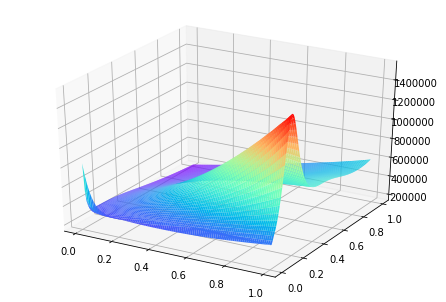

In [51]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=Axes3D(fig)

#3.将X,Ymatch到底面上
X,Y=np.meshgrid(alphas2,betas2)

Z = np.array(sse_two).reshape((99,99))


# Z = np.array(sse_two)
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=plt.get_cmap('rainbow'))


In [52]:
#Alpha = 0.01  #beta = 0.39 

Text(0.5, 1.0, "Holt's linear smoothing")

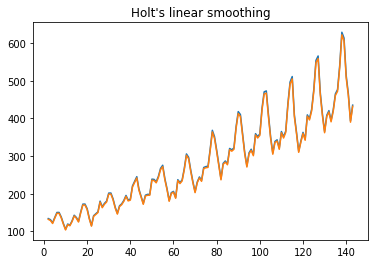

In [57]:
alpha_opt = 0.99
beta_opt = 0.01

holtsmoothed_step2 = pd.Series(holt_2(passenger,alpha_opt,beta_opt)[3:145],index = np.arange(2,144))
fig = plt.figure()
plt.plot(holtsmoothed_step2, label = "holt smoothed curve, alpha = 0.09 ,beta = 0.01")
plt.plot(passenger[2:], label="original data")
plt.title("Holt's linear smoothing")


In [54]:
holt_2(passenger,alpha_opt,beta_opt)[143:147]

[393.54201168140247, 435.19626404778126, 396.7462869532522, 438.39252889668484]